# Import

In [1]:
!pip install pyproj
!pip install pycraf
!pip install swifter
!pip install geopandas
!pip install topojson
!pip install pandas fiona shapely pyproj rtree
!pip install contextily
!pip install geopandas
!pip install pygeos
!pip install topojson
! pip install requests py7zr geopandas openpyxl tqdm s3fs PyYAML xlrd! 
! pip install git+https://github.com/inseefrlab/cartogether

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 59.0 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.3/8.3 MB 16.6 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 830.9/830.9 KB 16.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 22.9 MB/s eta 0:00:00
  Created wheel for swifter: filename=swifter-1.3.4-py3-none-any.whl size=16321 sha256=ba4393b800d3ec54f95ff0e562da390c5e4c59acf2a89d24c097b13f8d6b9365
  Stored in directory: /root/.cache/pip/wheels/2b/5e/f2/3931524f702ffd03309e96d35ee2fbf9c61c27377511ee8d4c
Successfully built swifter
Looking in indexes: https://pypi.org/simple, https://us-py

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import geopandas as gpd
import scipy.stats
from tqdm import tqdm
import pandas as pd
import numpy as np
import sklearn as sk
from sklearn.linear_model import LinearRegression
from numpy import mean
import glob
import os
from datetime import datetime
import math
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
pd.set_option('display.max_columns', None)

/usr/local/lib/python3.9/dist-packages/geopandas/_compat.py:123: UserWarning: The Shapely GEOS version (3.11.1-CAPI-1.17.1) is incompatible with the GEOS version PyGEOS was compiled with (3.10.4-CAPI-1.16.2). Conversions between both will be slow.
  warnings.warn(
<ipython-input-3-c4141d44453c>:1: UserWarning: Shapely 2.0 is installed, but because PyGEOS is also installed, GeoPandas will still use PyGEOS by default for now. To force to use and test Shapely 2.0, you have to set the environment variable USE_PYGEOS=0. You can do this before starting the Python process, or in your code before importing geopandas:

import os
os.environ['USE_PYGEOS'] = '0'
import geopandas

In a future release, GeoPandas will switch to using Shapely by default. If you are using PyGEOS directly (calling PyGEOS functions on geometries from GeoPandas), this will then stop working and you are encouraged to migrate from PyGEOS to Shapely 2.0 (https://shapely.readthedocs.io/en/latest/migration_pygeos.html).
  impo

In [4]:
data = pd.read_csv("/content/drive/Shareddrives/BDC Meilleur Taux Grp 4/base de données/Final.csv", )

<ipython-input-4-22fdd41f4243>:1: DtypeWarning: Columns (6,13,15,17) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("/content/drive/Shareddrives/BDC Meilleur Taux Grp 4/base de données/Final.csv", )


# Distribution du prix_m2_actualise pour maison et appartement dans chaque métropole

In [ ]:
def distribution_target_type_and_metropoles(data):
  for met in data.LIBEPCI.unique():
    g = sns.displot(data = data[data.LIBEPCI == met], x="prix_m2_actualise", hue="type_local", kde=True).set(title='Distribution of prix_m2_actualise for flats and houses, {}'.format(met))

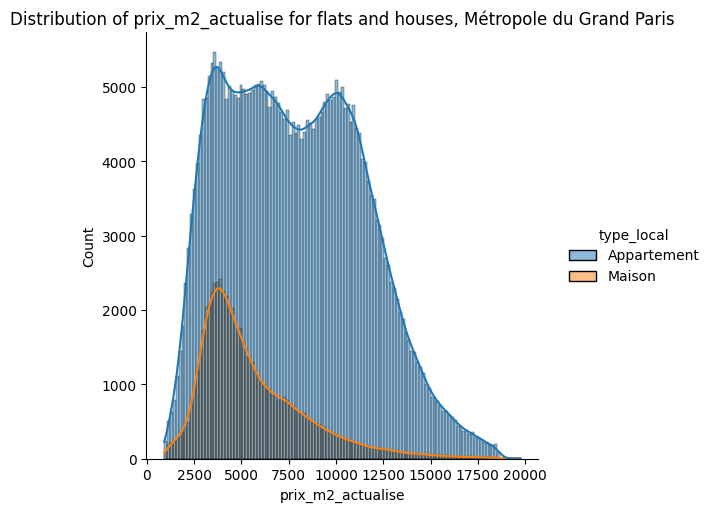

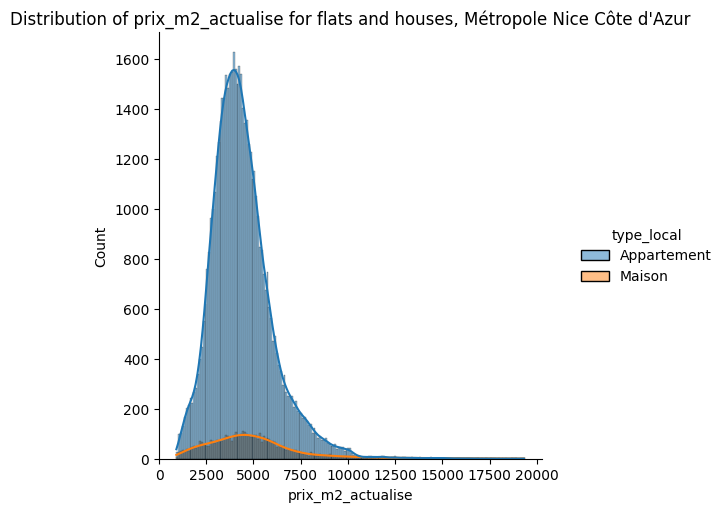

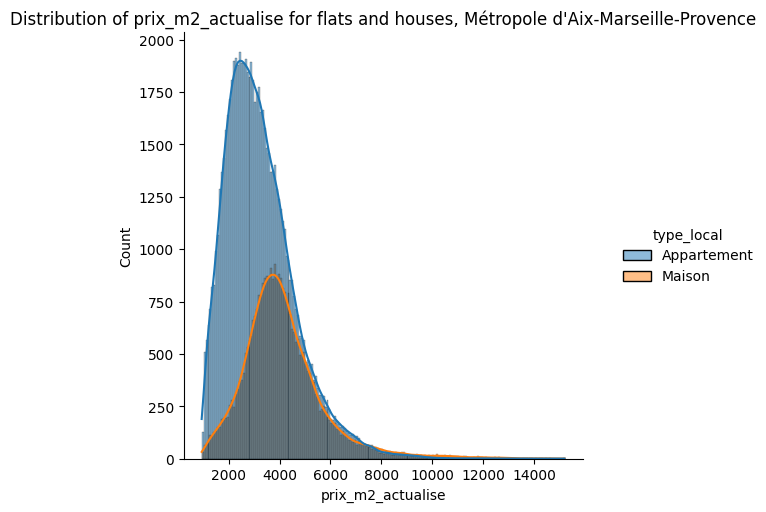

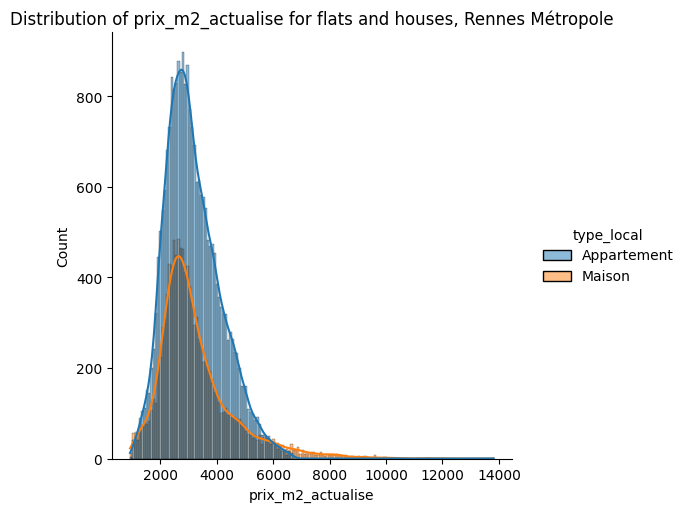

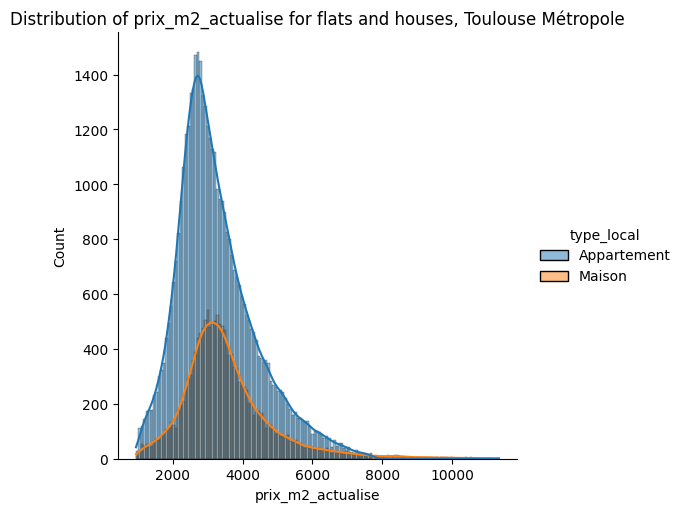

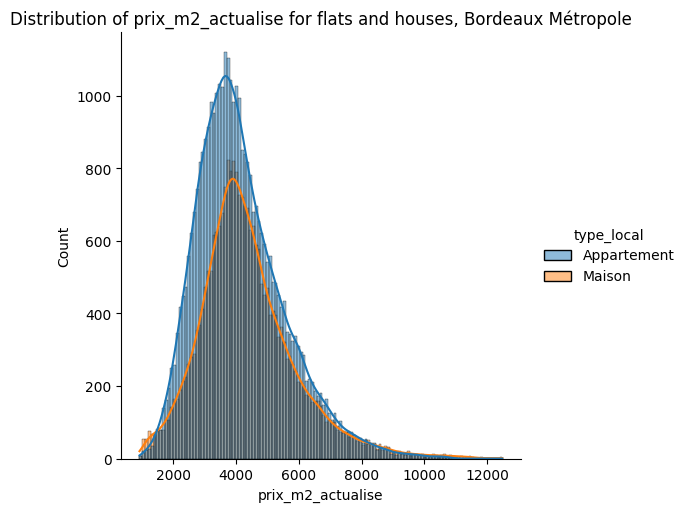

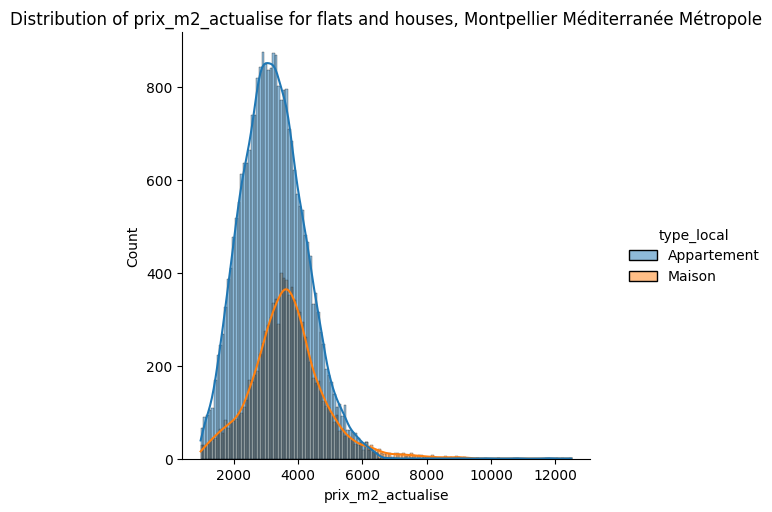

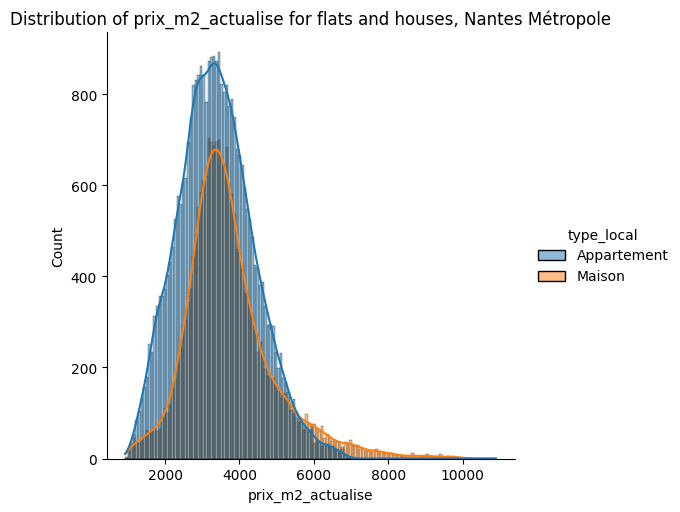

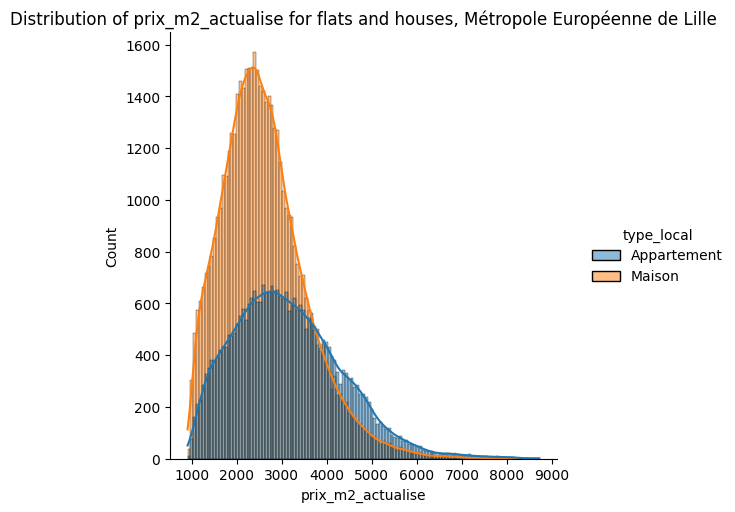

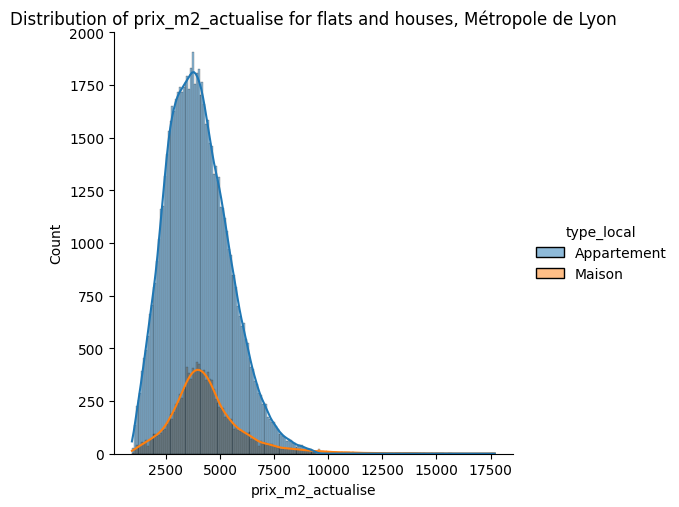

In [ ]:
distribution_target_type_and_metropoles(data)

In [ ]:
data.groupby('LIBEPCI')["prix_m2_actualise"].max()

LIBEPCI
Bordeaux Métropole                    12479.966393
Montpellier Méditerranée Métropole    12508.551262
Métropole Européenne de Lille          8716.006143
Métropole Nice Côte d'Azur            19330.000000
Métropole d'Aix-Marseille-Provence    15188.834154
Métropole de Lyon                     17698.220065
Métropole du Grand Paris              19752.641691
Nantes Métropole                      10897.530864
Rennes Métropole                      13811.487088
Toulouse Métropole                    11344.223485
Name: prix_m2_actualise, dtype: float64

# Correlation heatmap générale

<Axes: >

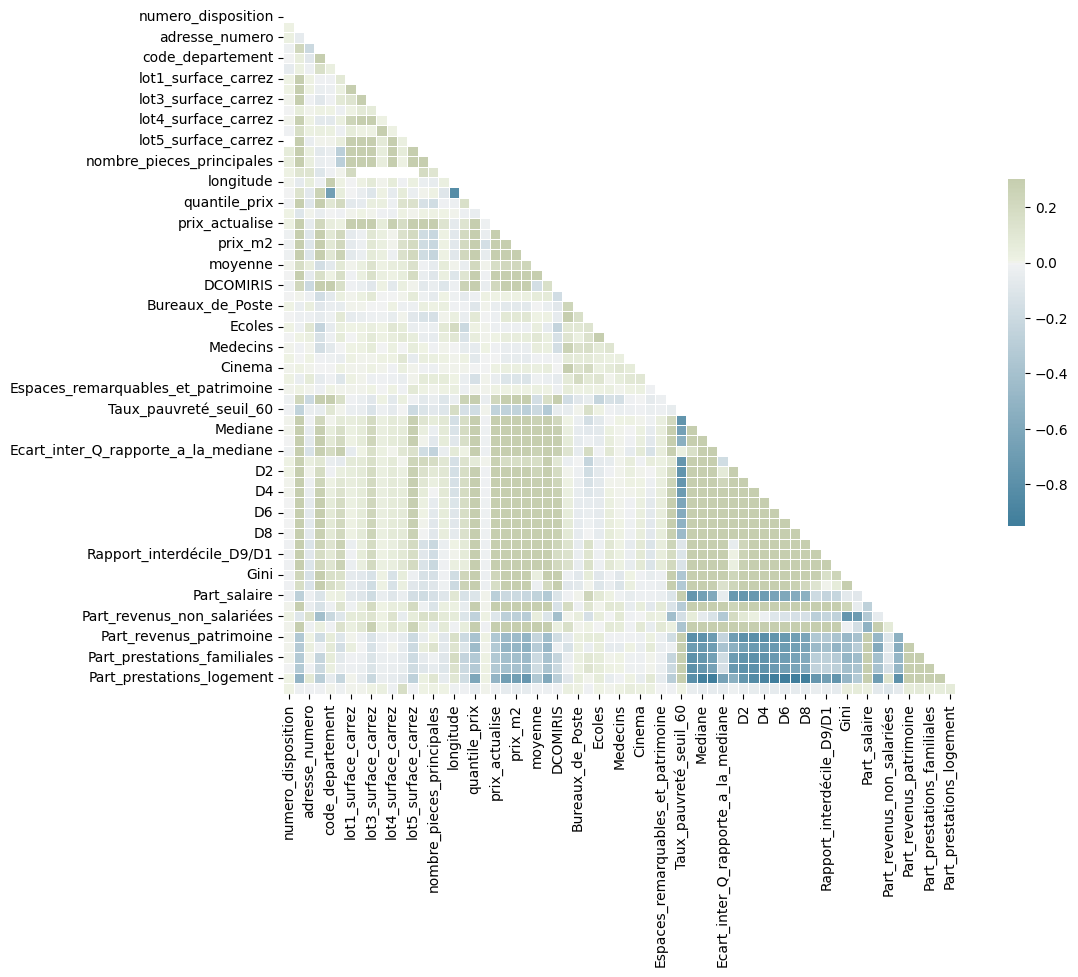

In [ ]:
# Compute the correlation matrix
corr = data.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 100, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

# Heatmap dont distinct par ville

In [ ]:
liste=['prix_m2_actualise',
       'nom_commune', 'LIBEPCI', 'code_departement', 'latitude', 'longitude',
       'type_local',
       'surface_reelle_bati', 'nombre_pieces_principales', 'surface_terrain',
       'prix_m2_zone',
       'trimestre_vente',
       'moyenne', 'moyenne_brevet',
       'Banques', 'Bureaux_de_Poste', 'Commerces', 'Ecoles', 'Collèges_Lycées', 'Medecins', 'Gares', 'Cinema', 'Bibliotheques', 'Espaces_remarquables_et_patrimoine', 
       'Taux_pauvreté_seuil_60', 'Q1', 'Mediane', 'Q3', 'Ecart_inter_Q_rapporte_a_la_mediane',
       'D1', 'D2', 'D3', 'D4', 'D5', 'D6', 'D7', 'D8', 'D9',
       'Rapport_interdécile_D9/D1', 'S80/S20', 'Gini',
       'Part_revenus_activite', 'Part_salaire', 'Part_revenus_chomage', 'Part_revenus_non_salariées', 'Part_retraites', 'Part_revenus_patrimoine',
       'Part_prestations_sociales', 'Part_prestations_familiales', 'Part_minima_sociaux', 'Part_prestations_logement', 'Part_impôts']

data2 = data[liste]

In [ ]:
def plot_heatmap(data, variable_ref, local=None, color= sns.diverging_palette(29 , 29, center = 'light', sep = 1, n = 40)):
  plt.figure(figsize=(8, 12))
  if local:
    heatmap = sns.heatmap(data[data.LIBEPCI == local].corr()[[variable_ref]].sort_values(by=variable_ref, ascending=False), vmin=-1, vmax=1, annot=True, cmap=color)
    heatmap.set_title("Features Correlating with {}, {}".format(variable_ref, local), fontdict={'fontsize':18}, pad=16);  
  else:
    heatmap = sns.heatmap(data.corr()[[variable_ref]].sort_values(by=variable_ref, ascending=False), vmin=-1, vmax=1, annot=True, cmap=color)
    heatmap.set_title("Features Correlating with {}".format(variable_ref), fontdict={'fontsize':18}, pad=16);  

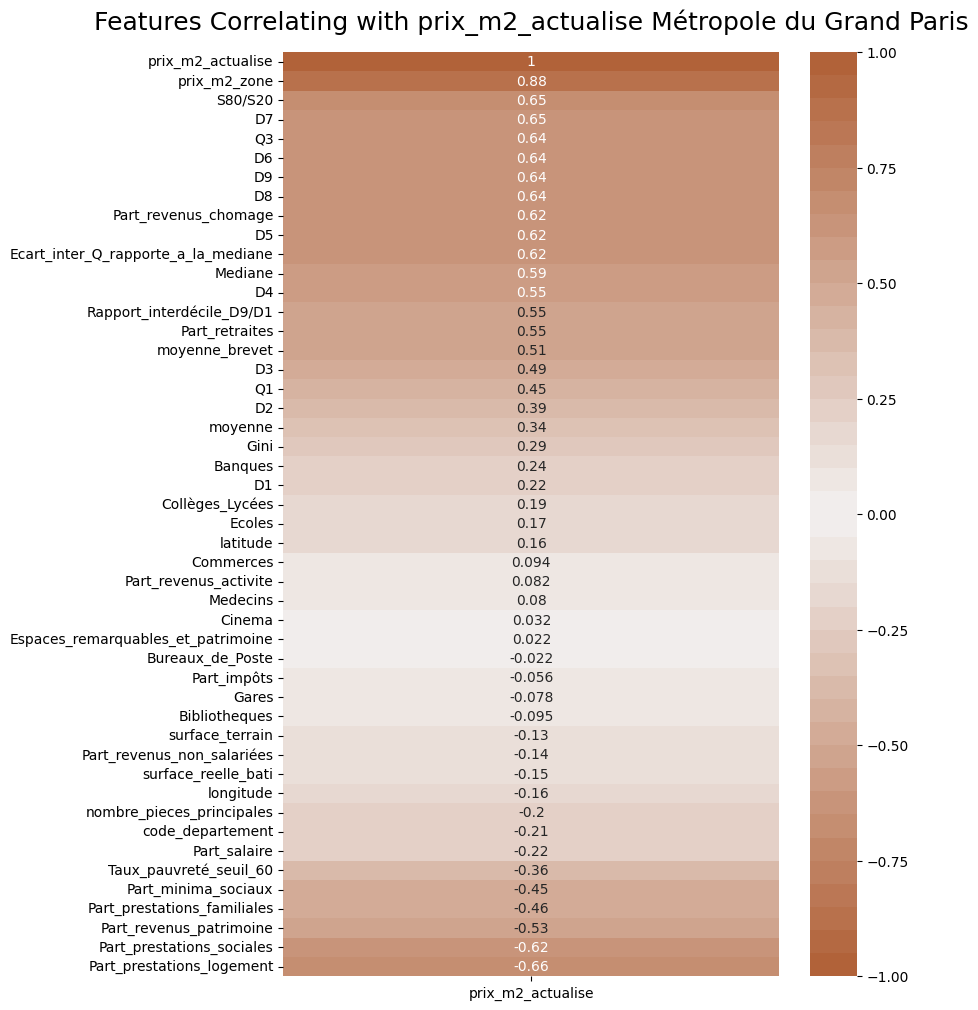

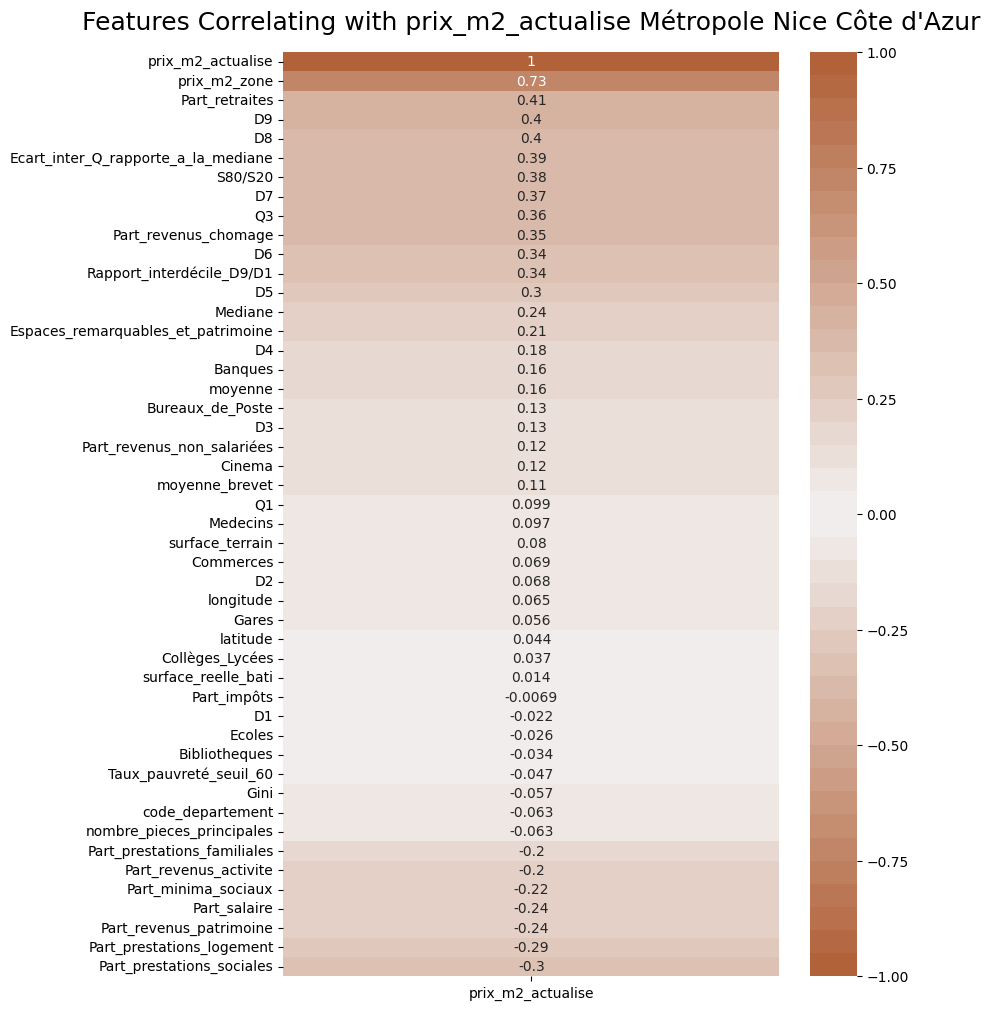

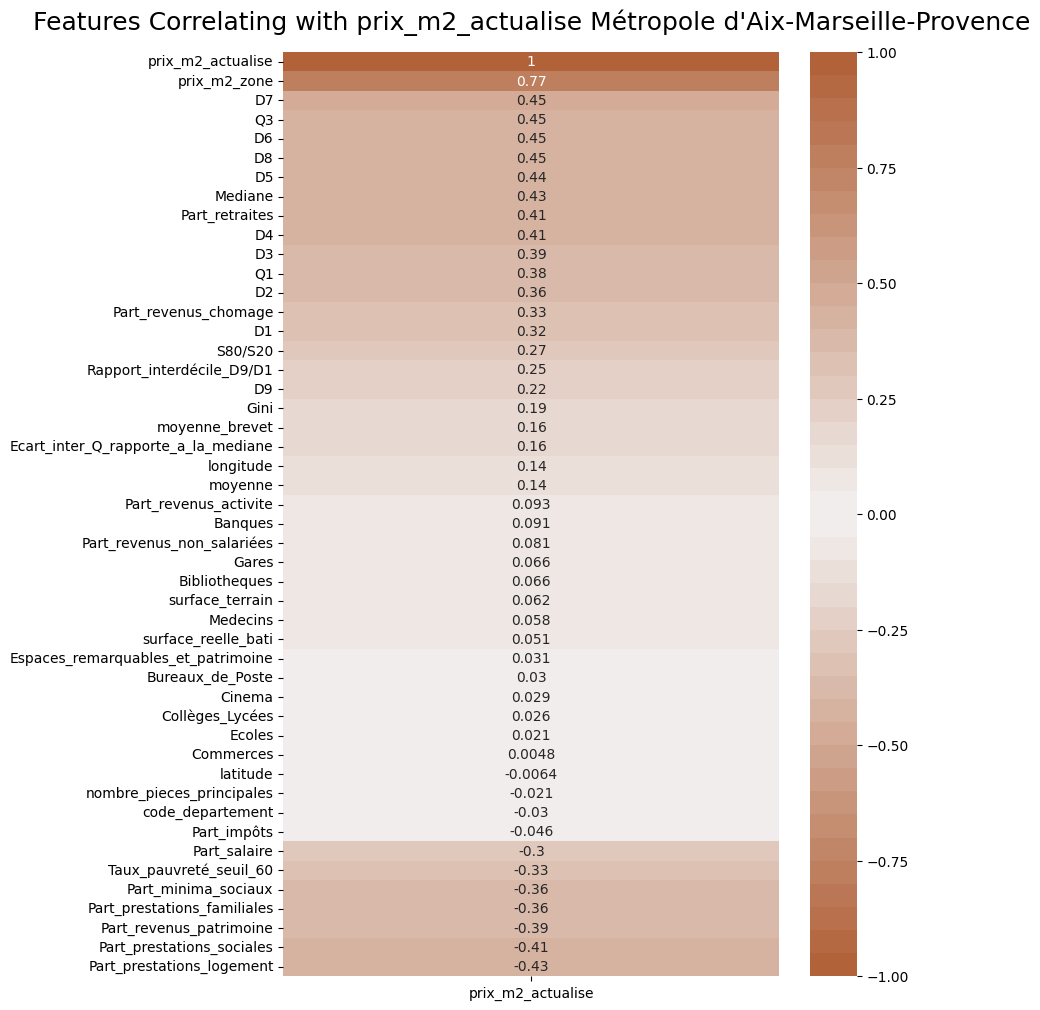

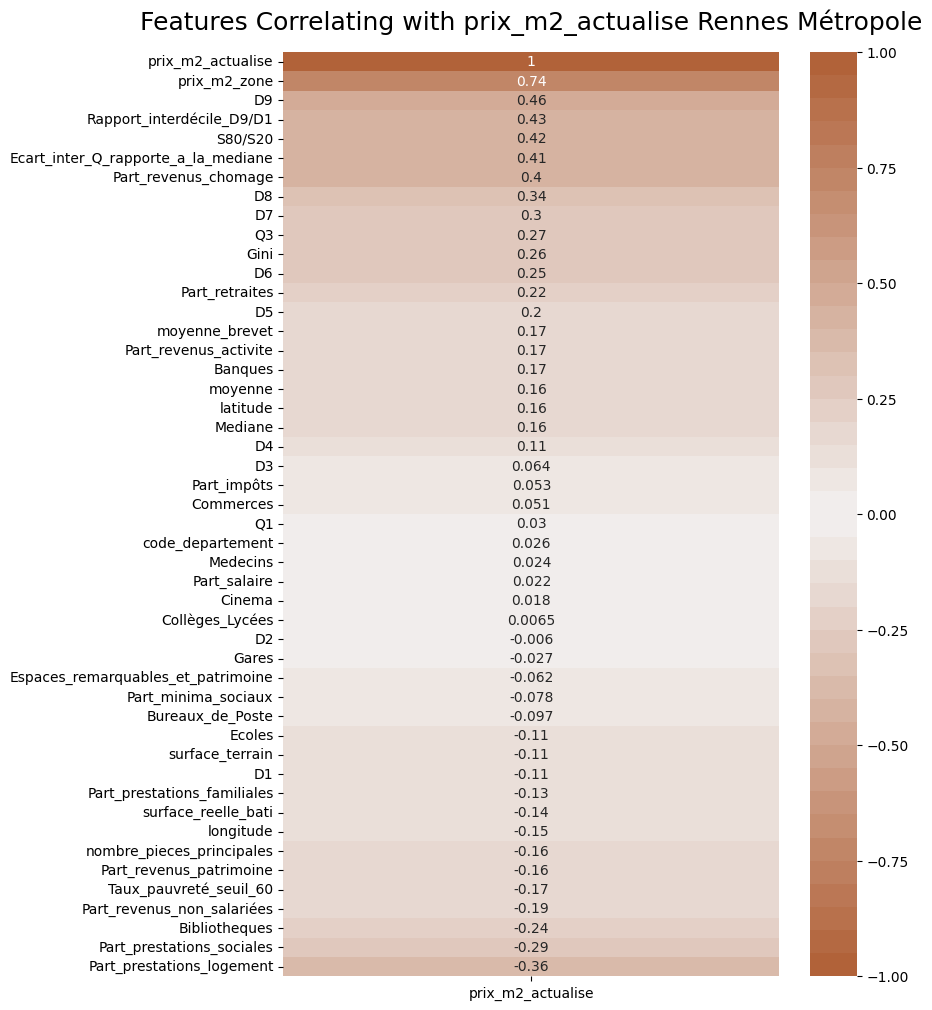

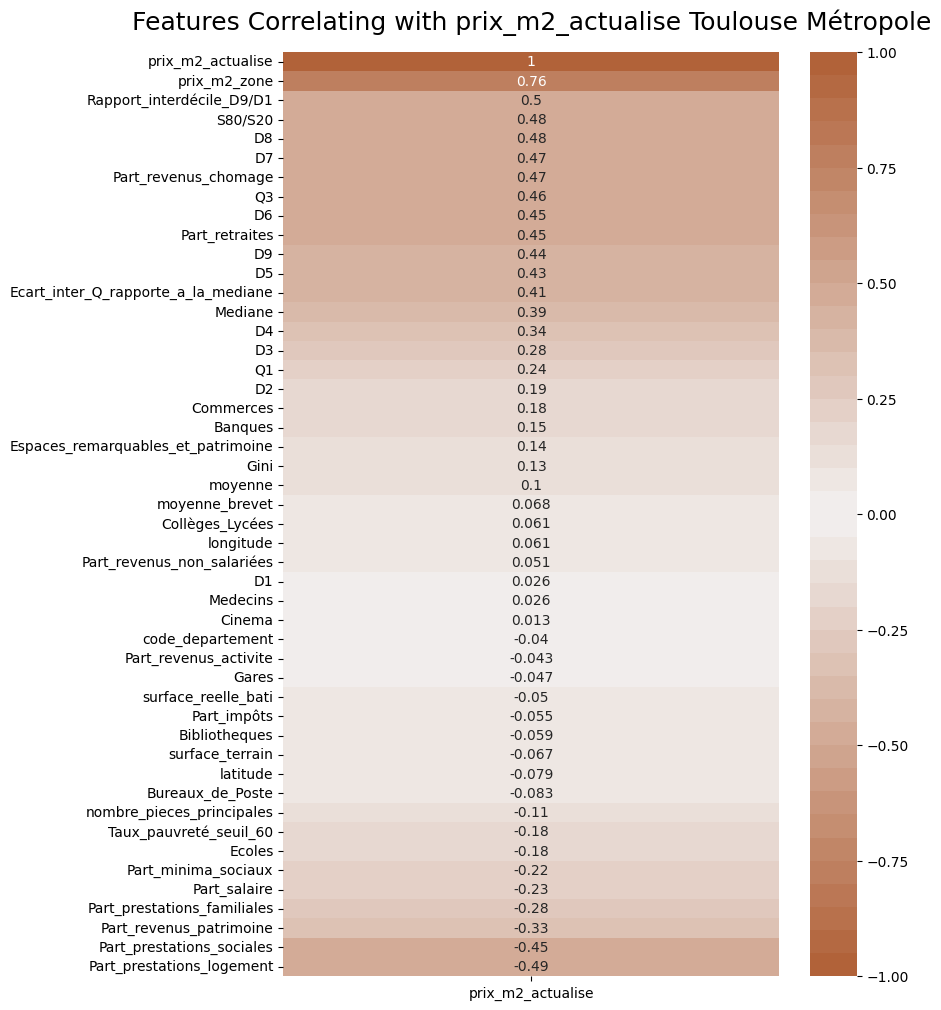

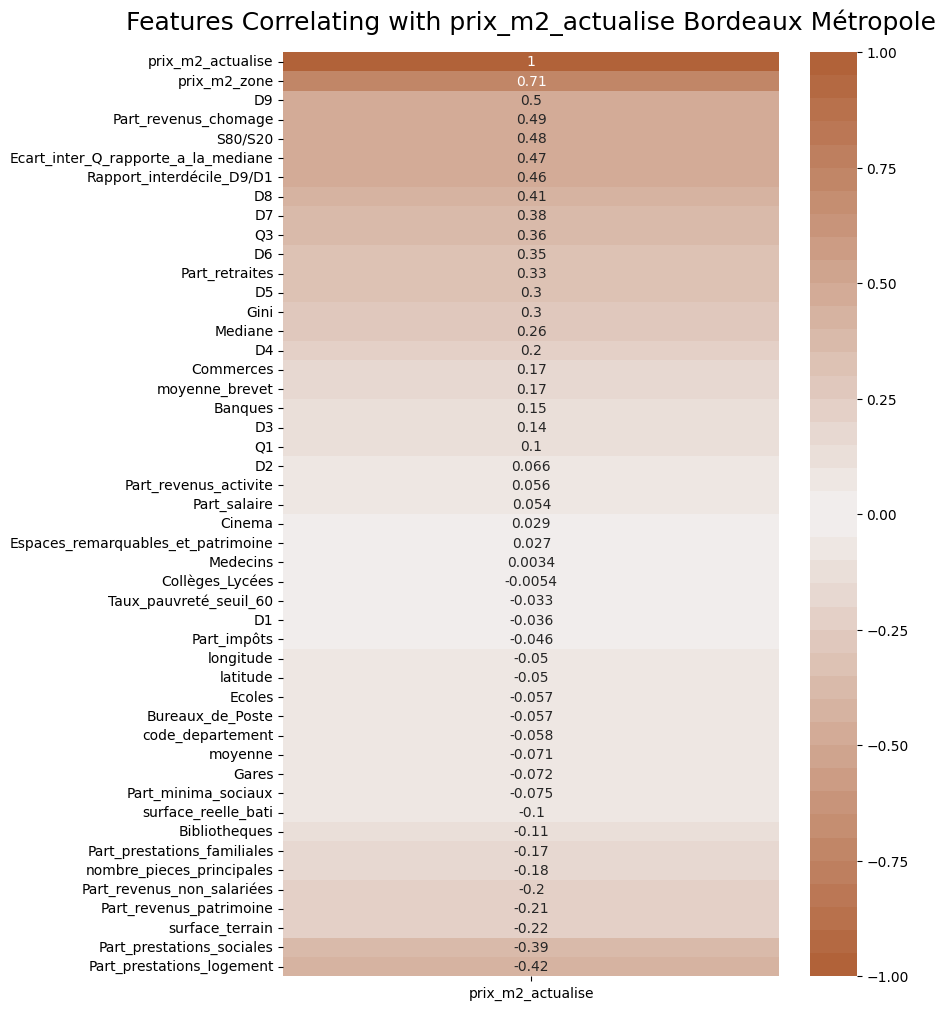

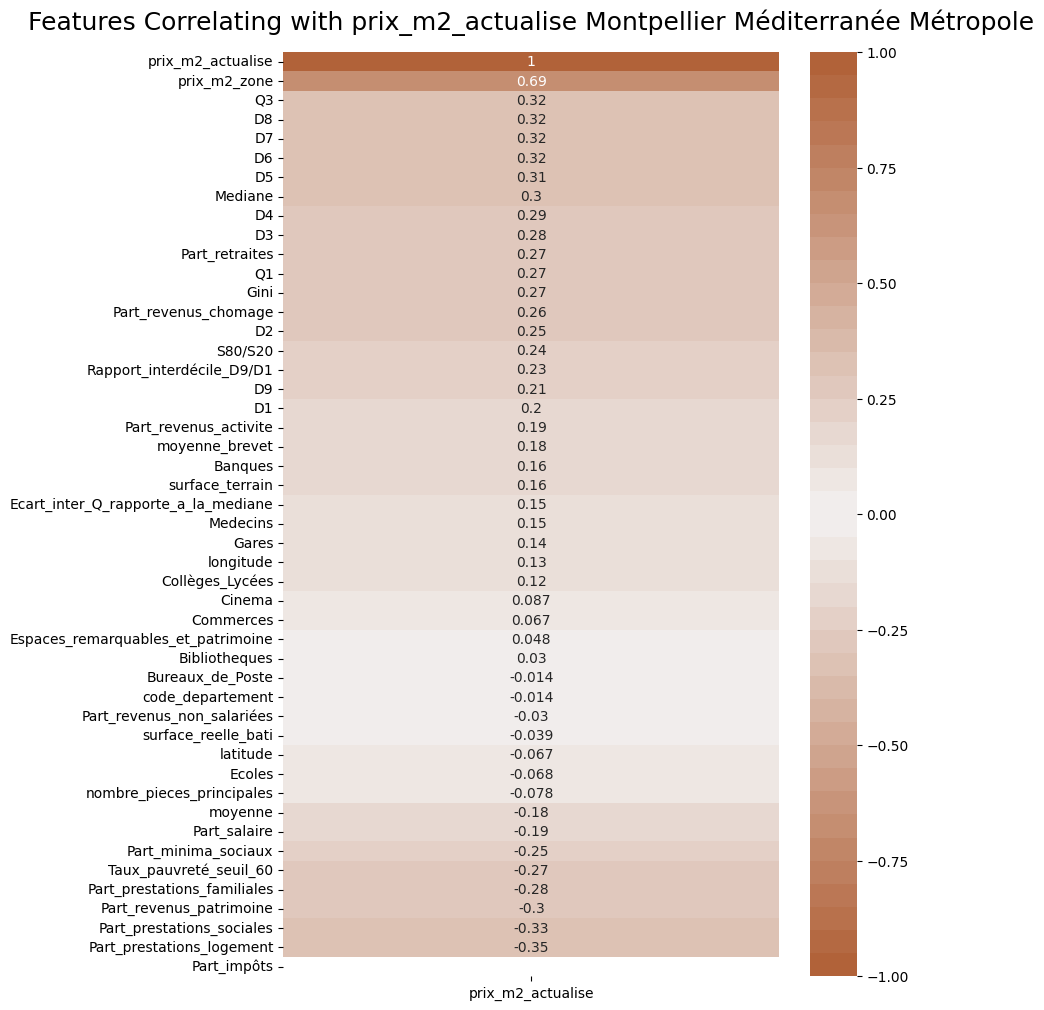

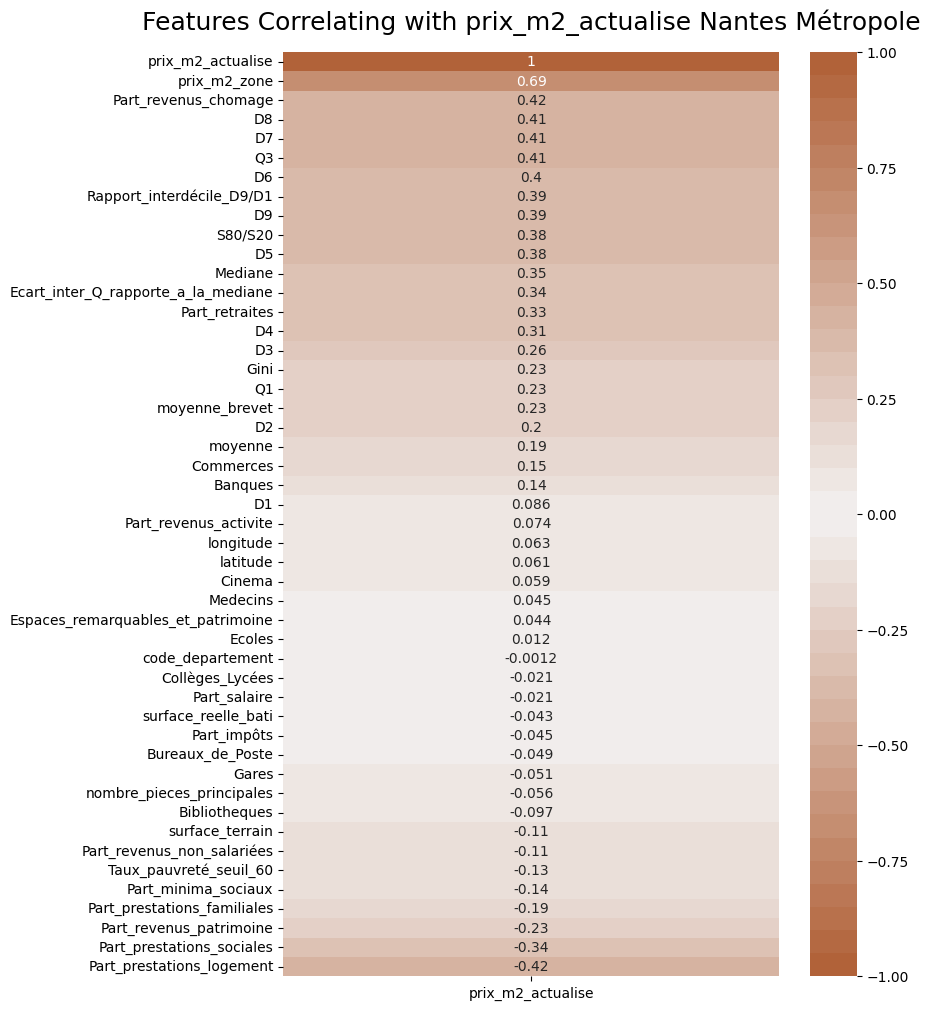

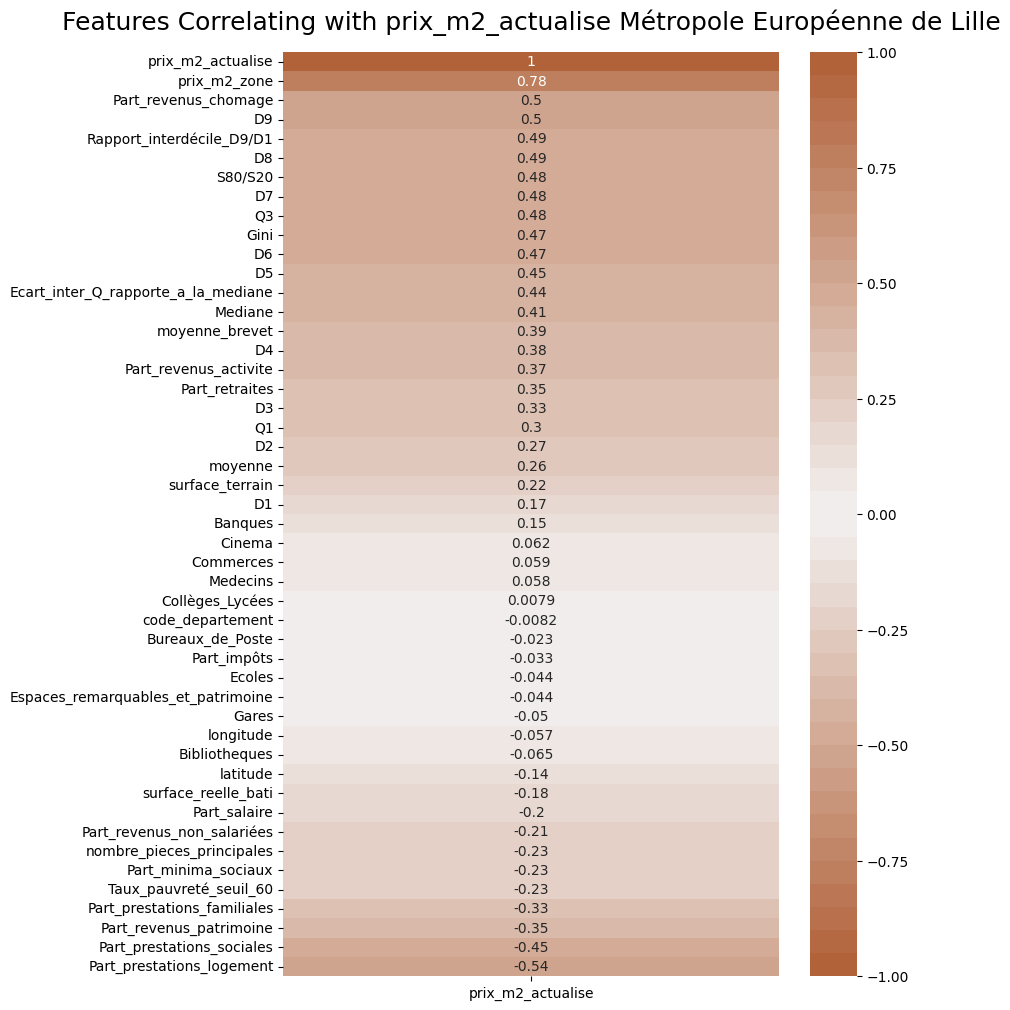

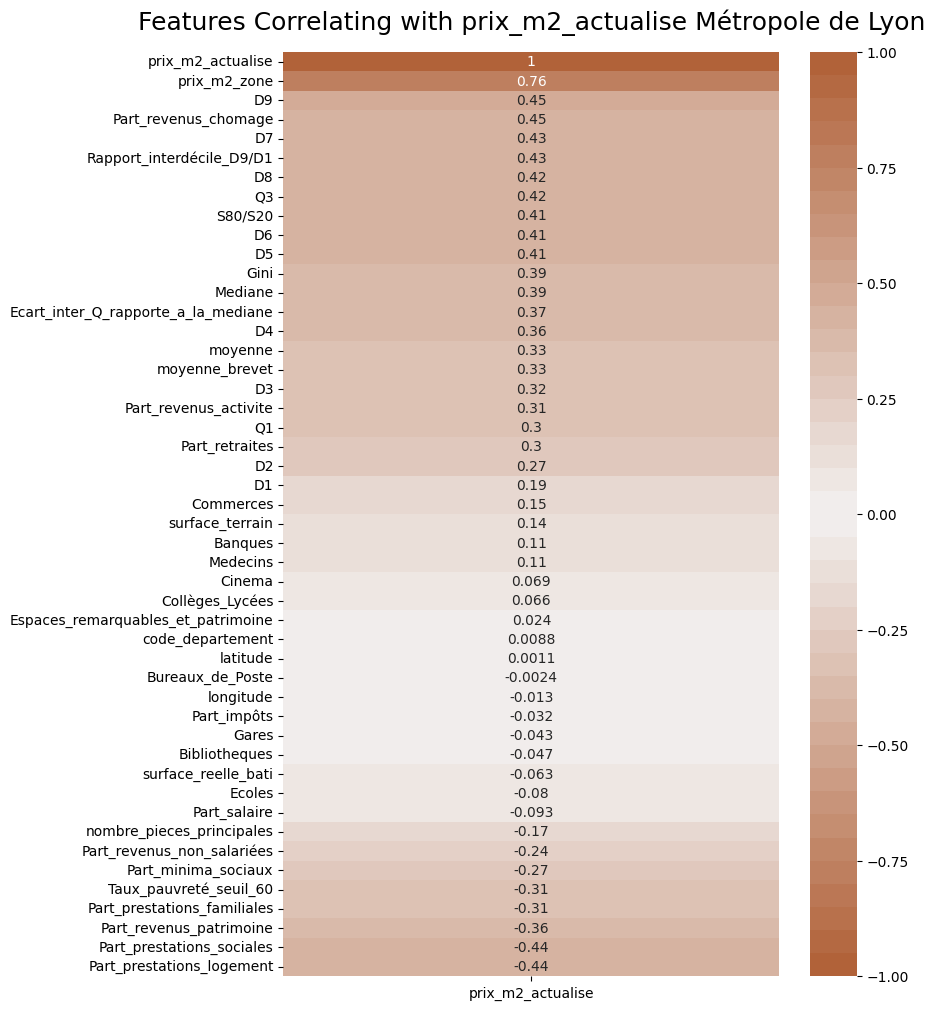

In [ ]:
for local in data.LIBEPCI.unique():
  plot_heatmap(data2, 'prix_m2_actualise', local)

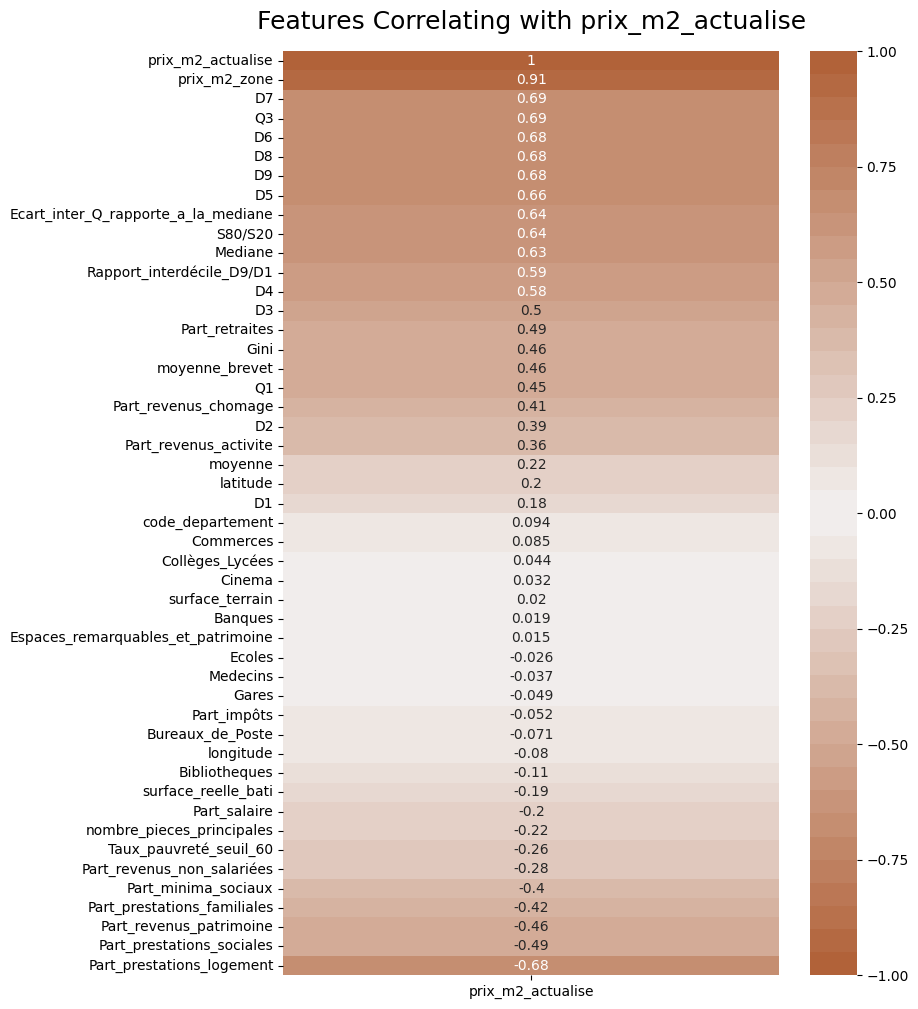

In [ ]:
plot_heatmap(data2, 'prix_m2_actualise')

# Maison vs Appartement par métropole

In [ ]:
def plot_flats_houses_shares(data):
  
  # set the figure size
  plt.figure(figsize=(20, 8))

  # from raw value to percentage
  total = data.groupby('LIBEPCI')['type_local'].count().reset_index()
  type_local = data[data.type_local=='Appartement'].groupby('LIBEPCI')['type_local'].count().reset_index()
  type_local['type_local'] = [i / j * 100 for i,j in zip(type_local['type_local'], total['type_local'])]
  total['type_local'] = [i / j * 100 for i,j in zip(total['type_local'], total['type_local'])]

  # bar chart 1 -> top bars (group of 'smoker=No')
  bar1 = sns.barplot(x="LIBEPCI",  y="type_local", data=total, color='orange')

  # bar chart 2 -> bottom bars (group of 'smoker=Yes')
  bar2 = sns.barplot(x="LIBEPCI", y="type_local", data=type_local, color='grey')

  # add legend
  top_bar = mpatches.Patch(color='orange', label='Maison')
  bottom_bar = mpatches.Patch(color='grey', label='Appartement')
  plt.legend(handles=[top_bar, bottom_bar])

  # show the graph
  plt.xticks(rotation=40)
  plt.show()

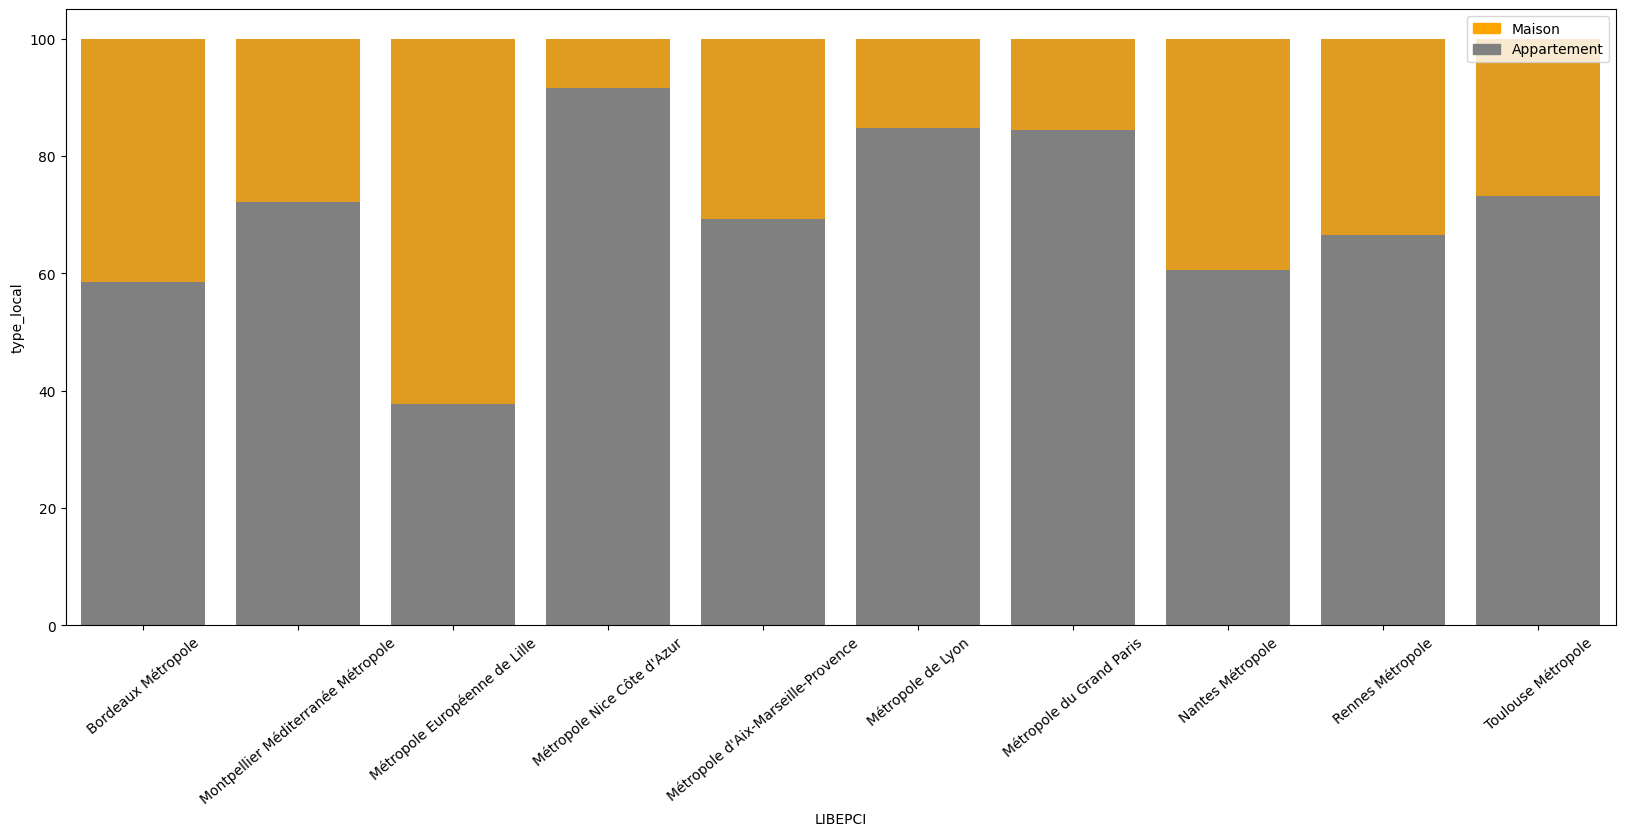

In [ ]:
plot_flats_houses_shares(data)

In [ ]:
def box_flats_houses(data):  
  fig = plt.figure(figsize=(20,8))

  plt.subplot(1, 2, 1)
  sns.boxplot(data=data, x="type_local", y="surface_reelle_bati", palette = ['grey', 'orange'])

  plt.subplot(1, 2, 2)
  sns.boxplot(data=data, x="type_local", y="nombre_pieces_principales", palette = ['grey', 'orange'])

  plt.show()

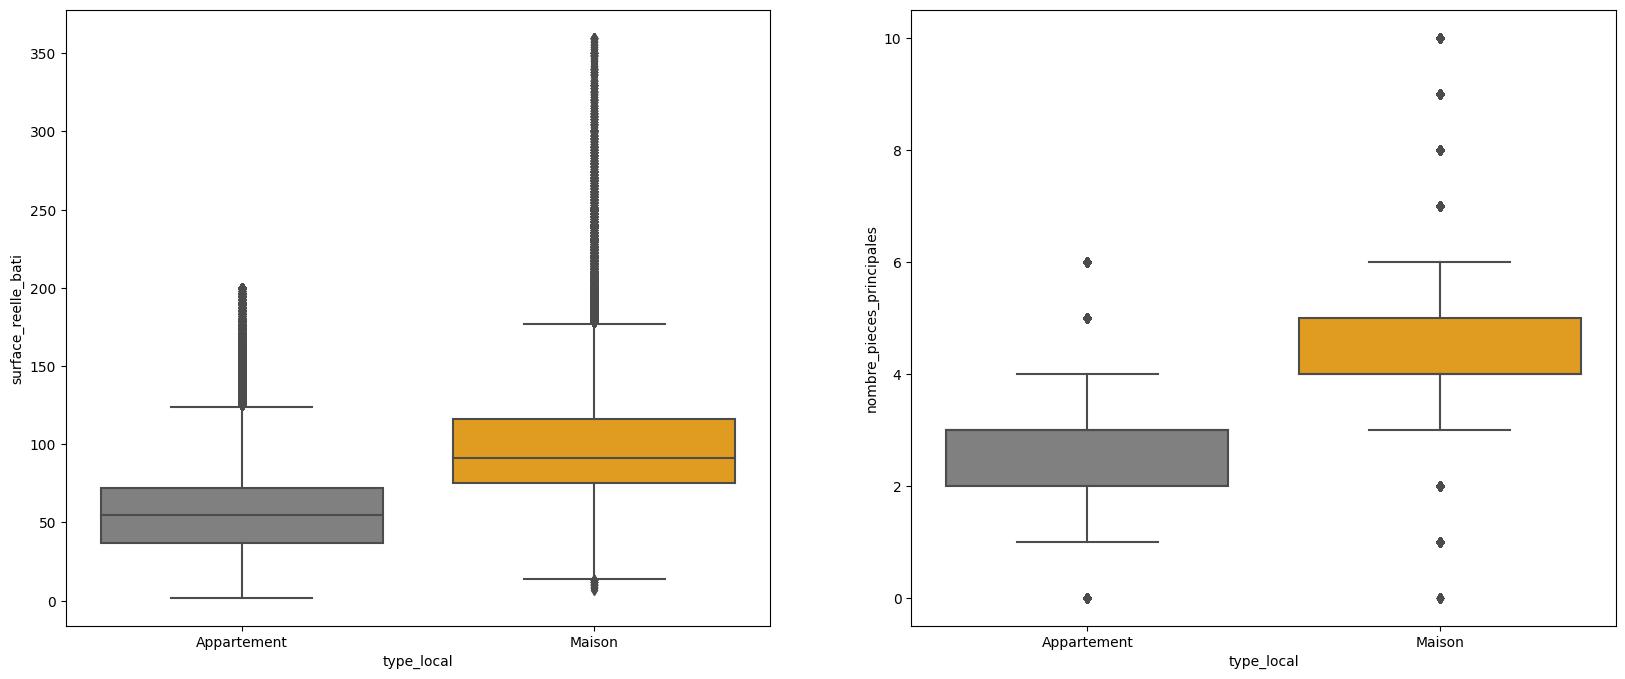

In [ ]:
box_flats_houses(data)

In [ ]:
def box_flats_houses_surface(data):
  fig = plt.figure(figsize=(20,8))

  plt.subplot(1, 2, 1)
  sns.boxenplot(data=data, x="type_local", y="surface_reelle_bati", palette = ['grey', 'orange'])

  plt.subplot(1, 2, 2)
  sns.boxenplot(data=data, x="type_local", y="nombre_pieces_principales", palette = ['grey', 'orange'])

  plt.show()

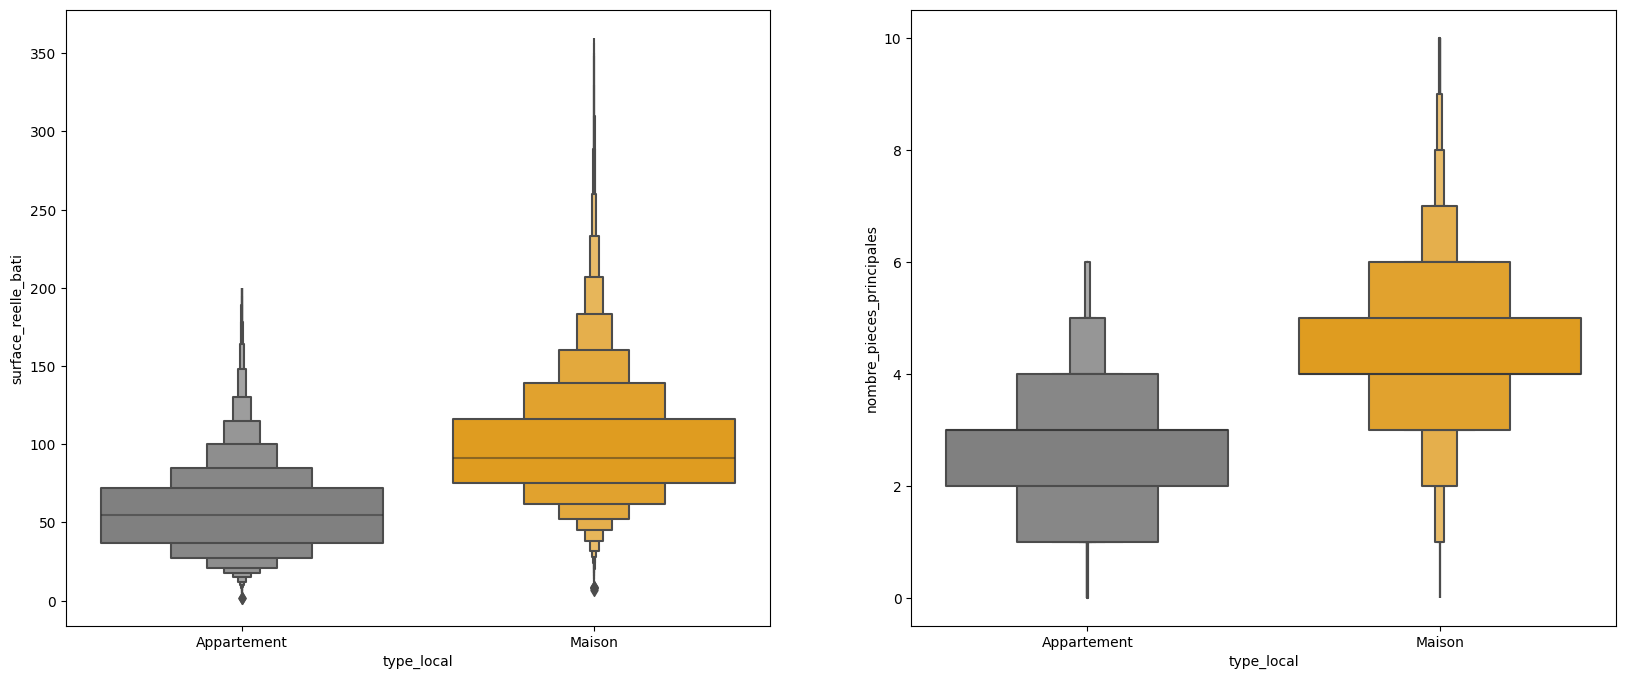

In [ ]:
box_flats_houses_surface(data)

In [ ]:
palet_10 = sns.dark_palette("orange", 10)
palet_cmap = sns.dark_palette("orange", as_cmap=True)

In [ ]:
def box_flats_houses_metropoles(data):
  fig = plt.figure(figsize=(10,15))

  palet = sns.dark_palette("orange", 10)

  plt.subplot(2, 1, 1)
  ax=sns.boxplot(data=data, x="type_local", y="surface_reelle_bati",hue="LIBEPCI", palette = palet_10)
  sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

  plt.subplot(2, 1, 2)
  ax2=sns.boxplot(data=data, x="type_local", y="nombre_pieces_principales",hue="LIBEPCI", palette = palet_10)
  sns.move_legend(ax2, "upper left", bbox_to_anchor=(1, 1))
  plt.show()

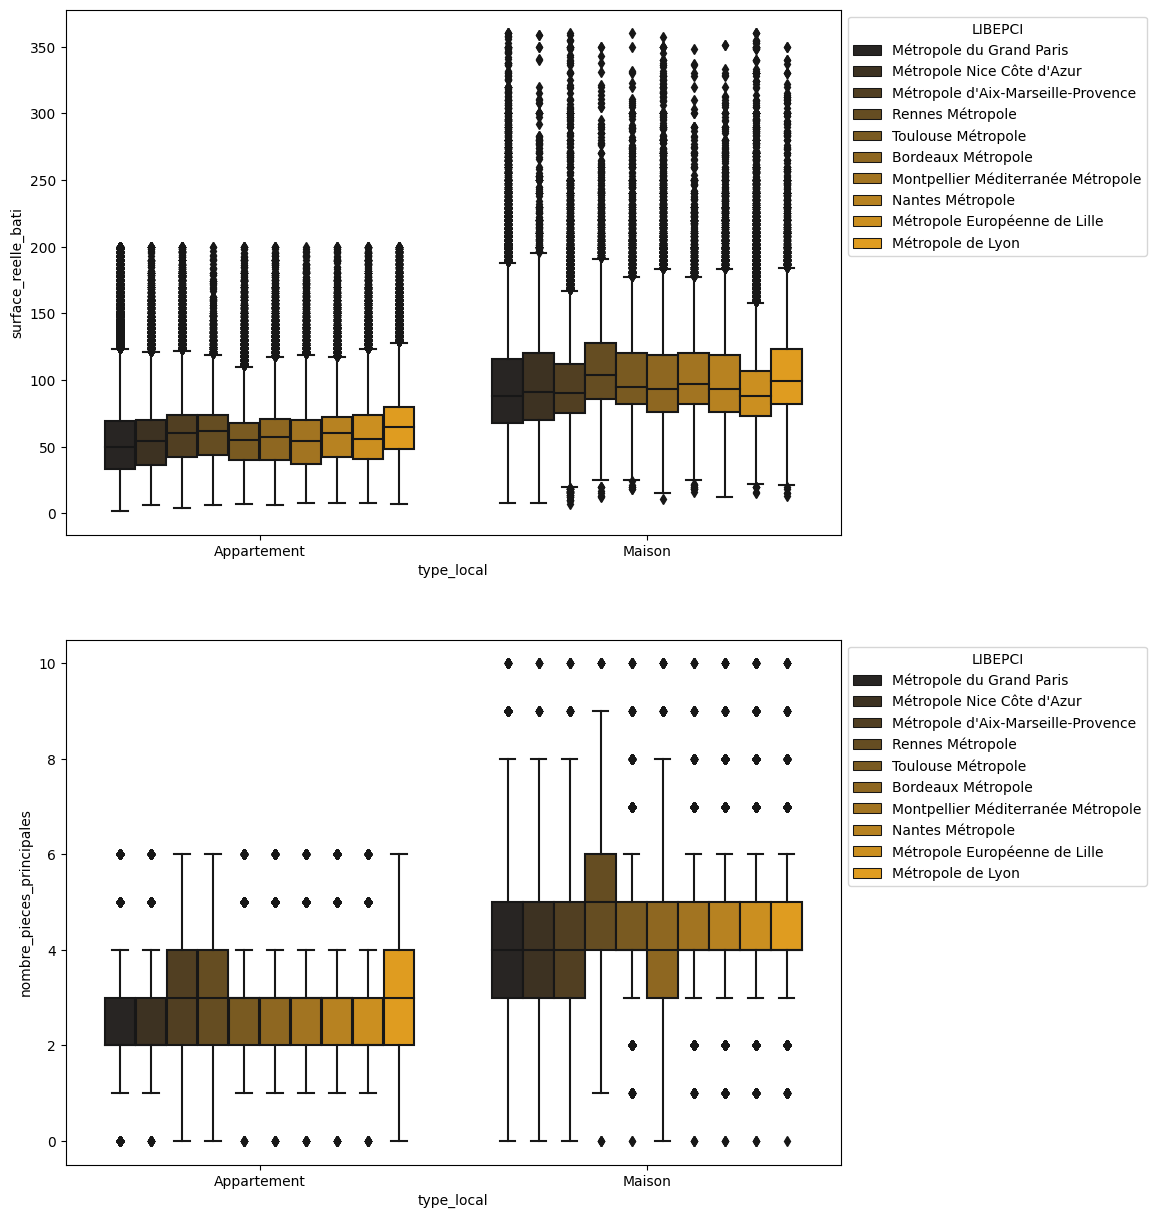

In [ ]:
box_flats_houses_metropoles(data)

In [ ]:
def box_flats_houses_metropoles_2(data):
  fig = plt.figure(figsize=(10,15))

  plt.subplot(2, 1, 1)
  ax=sns.boxenplot(data=data, x="type_local", y="surface_reelle_bati",hue="LIBEPCI", palette = palet_10)
  sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

  plt.subplot(2, 1, 2)
  ax2=sns.boxenplot(data=data, x="type_local", y="nombre_pieces_principales",hue="LIBEPCI", palette = palet_10)
  sns.move_legend(ax2, "upper left", bbox_to_anchor=(1, 1))
  plt.show()

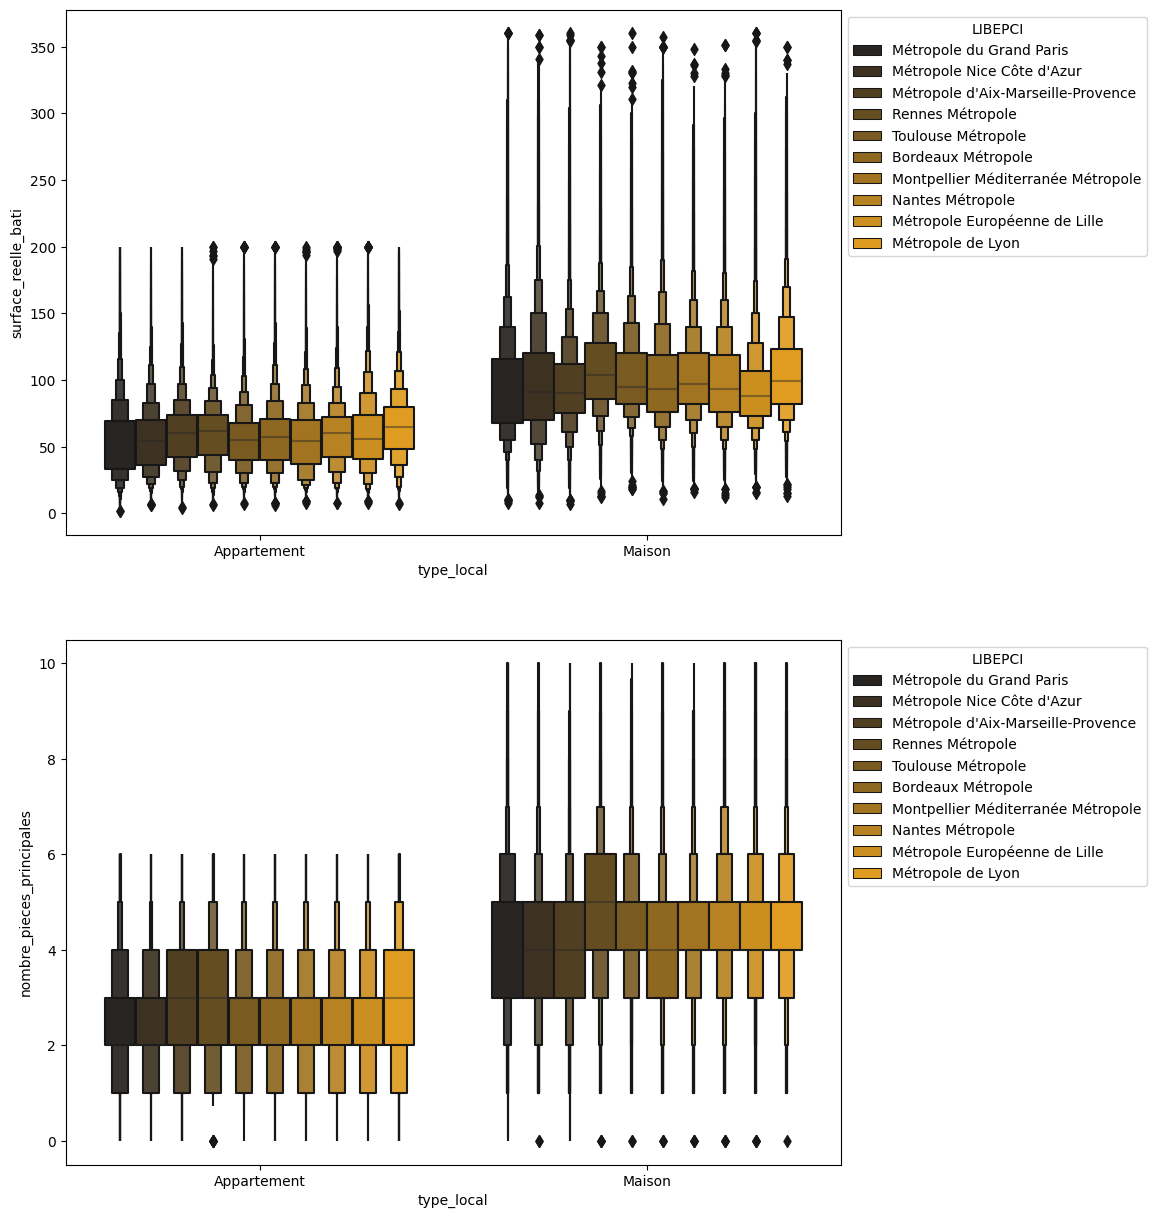

In [ ]:
box_flats_houses_metropoles_2(data)

# Préparation cartes

In [5]:
# convertir en geopandas pour la suite
def convert_gpd(df):
  return gpd.GeoDataFrame(
    df, geometry = gpd.points_from_xy(df.longitude, df.latitude))

In [6]:
data = convert_gpd(data)

In [ ]:
data.columns

Index(['id_mutation', 'date_mutation', 'numero_disposition', 'valeur_fonciere',
       'adresse_numero', 'adresse_nom_voie', 'adresse_code_voie',
       'code_commune', 'nom_commune', 'code_departement', 'LIBEPCI',
       'id_parcelle', 'nombre_lots', 'lot1_numero', 'lot1_surface_carrez',
       'lot2_numero', 'lot2_surface_carrez', 'lot3_numero',
       'lot3_surface_carrez', 'lot4_numero', 'lot4_surface_carrez',
       'lot5_numero', 'lot5_surface_carrez', 'type_local',
       'surface_reelle_bati', 'nombre_pieces_principales', 'surface_terrain',
       'longitude', 'latitude', 'geometry', 'quantile_prix', 'coeff_actu',
       'prix_actualise', 'prix_m2_actualise', 'prix_m2', 'trimestre_vente',
       'prix_m2_zone', 'moyenne', 'moyenne_brevet', 'DCOMIRIS', 'indices',
       'Banques', 'Bureaux_de_Poste', 'Commerces', 'Ecoles', 'Collèges_Lycées',
       'Medecins', 'Gares', 'Cinema', 'Bibliotheques',
       'Espaces_remarquables_et_patrimoine', 'DCIRIS',
       'Taux_pauvreté_seuil_6

In [17]:
iris_value = pd.read_csv('/content/drive/Shareddrives/BDC Meilleur Taux Grp 4/base de données/IRIS_donnees.csv', delimiter = ';')
iris_shape = gpd.read_file('/content/drive/Shareddrives/BDC Meilleur Taux Grp 4/base de données/IRIS_contours.shp')

In [18]:
iris_shape.drop_duplicates(subset=['DCOMIRIS'], keep = 'first', inplace = True)
iris_value.drop_duplicates(subset=['IRIS'], keep = 'first', inplace = True)

In [7]:
communes_shape = gpd.read_file('/content/drive/Shareddrives/BDC Meilleur Taux Grp 4/base de données/communes-20220101.shp')

In [19]:
def iris_prep(iris_value, iris_shape, value_on, shape_on):

  iris_shape.drop_duplicates(subset=['DCOMIRIS'], keep = 'first', inplace = True)
  iris_value.drop_duplicates(subset=['IRIS'], keep = 'first', inplace = True)
  iris_value[value_on] = iris_value[value_on].astype(str).str.rjust(9, '0')

  # merge iris_shape et iris_value pour avoir les polygones dans la même table que les variables de chaque IRIS
  iris = iris_shape.merge(iris_value, how = 'left', right_on = value_on, left_on = shape_on)
  iris.drop_duplicates(subset=['DCOMIRIS'], keep = 'first', inplace = True)

  return iris

In [20]:
iris = iris_prep(iris_value, iris_shape, 'IRIS', 'DCOMIRIS')

In [21]:
iris['iris_geometry'] = iris.geometry
data_2 = gpd.sjoin(data, iris, how='left', op='within')
data_2 = data_2.drop(columns = ['iris_geometry'])

/usr/local/lib/python3.9/dist-packages/IPython/core/interactiveshell.py:3473: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):
<ipython-input-21-64d3a62b6d42>:2: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: None
Right CRS: EPSG:4326

  data_2 = gpd.sjoin(data, iris, how='left', op='within')


In [9]:
data_2 = data_2.set_crs(4171)

In [10]:
data_2['nom_commune'] = data_2['nom_commune'].str.upper()
data_2.loc[data_2.nom_commune.str.startswith('PARIS ').fillna(False), 'nom_commune'] = 'Paris'
data_2.loc[data_2.nom_commune.str.startswith('MARSEILLE ').fillna(False), 'nom_commune'] = 'Marseille'
data_2.loc[data_2.nom_commune.str.startswith('LYON ').fillna(False), 'nom_commune'] = 'Lyon'
data_2['nom_commune'] = data_2['nom_commune'].str.upper()

In [22]:
iris.loc[iris.NOM_COM.str.startswith('PARIS ').fillna(False), 'NOM_COM'] = 'Paris'
iris.loc[iris.NOM_COM.str.startswith('MARSEILLE ').fillna(False), 'NOM_COM'] = 'Marseille'
iris.loc[iris.NOM_COM.str.startswith('LYON ').fillna(False), 'NOM_COM'] = 'Lyon'
iris['NOM_COM'] = iris['NOM_COM'].str.upper()

communes_shape.nom = communes_shape.nom.str.upper() 

In [11]:
# !!!!!!!!!!!!!!!! CHOOSE THE PALETTE FOR THE COLORS !!!!!!!!!!!!!!!!

# cmap = sns.dark_palette("orange", reverse=True, as_cmap=True)
cmap = plt.get_cmap("jet")

# IRIS seul avec choix de la variable de fond

In [ ]:
def plot_var_iris(area, var, size):
  figure = iris[iris.NOM_COM == area].plot(column = var,
                                                  figsize = size,
                                                  legend = True,
                                                  cmap=cmap,
                                                  legend_kwds={'label': "prix m2 moyen des biens de l'IRIS"})
  figure.set_axis_off()

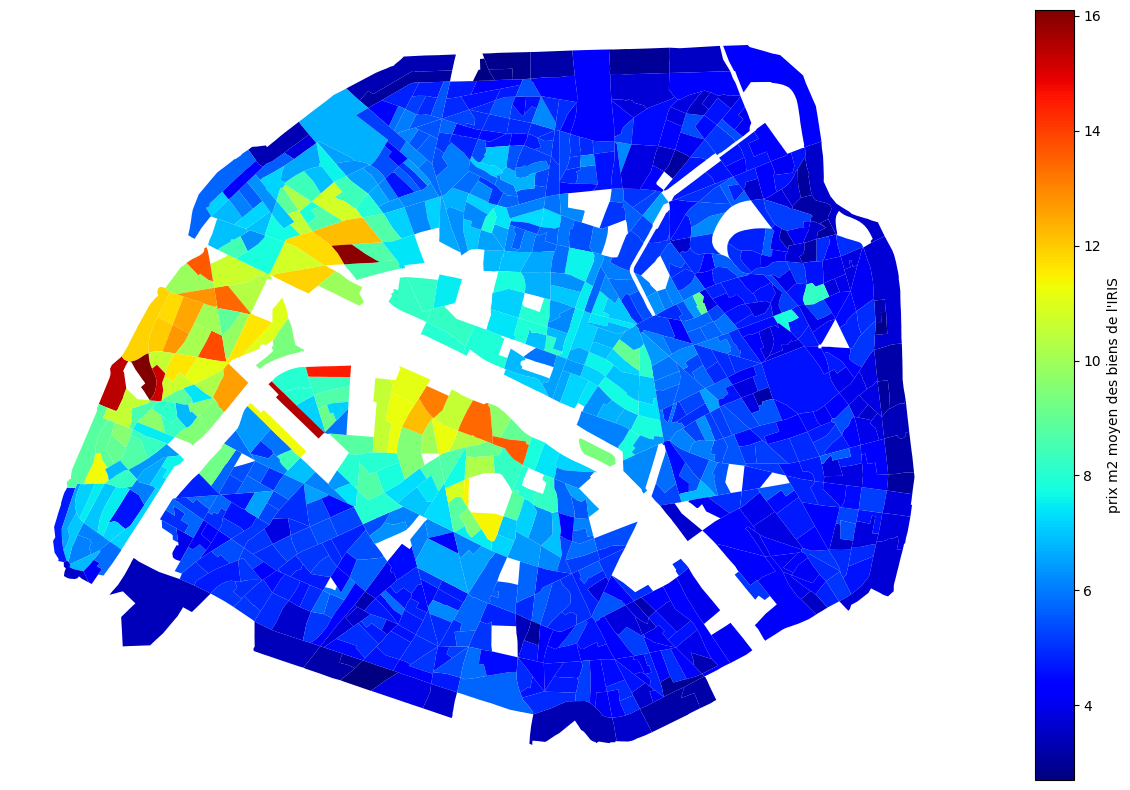

In [ ]:
# plot_var_iris('LYON', 'DISP_TP6019')
plot_var_iris('PARIS', 'DISP_RD19', (20,10))

# Tous les biens seul, choix de la ville

In [ ]:
def bien(area, size):
  '''
  Tous les biens d'une commune sur le fond de la commune. Couleur correspond au prix_m2
  '''
  # cmap = sns.dark_palette("orange", reverse=True, as_cmap=True)

  data_2.to_crs(communes_shape.crs)
  base = communes_shape[communes_shape.nom == area].plot(figsize = size, alpha = 0.1)
  figure = data_2[data_2['NOM_COM'] == area].plot(ax = base,
                                                      column = 'prix_m2_actualise',
                                                      figsize = size,
                                                      alpha = 0.2,
                                                      legend = True,
                                                      cmap=cmap,
                                                      legend_kwds={'label': "prix m2 des biens"})
  figure.set_axis_off()

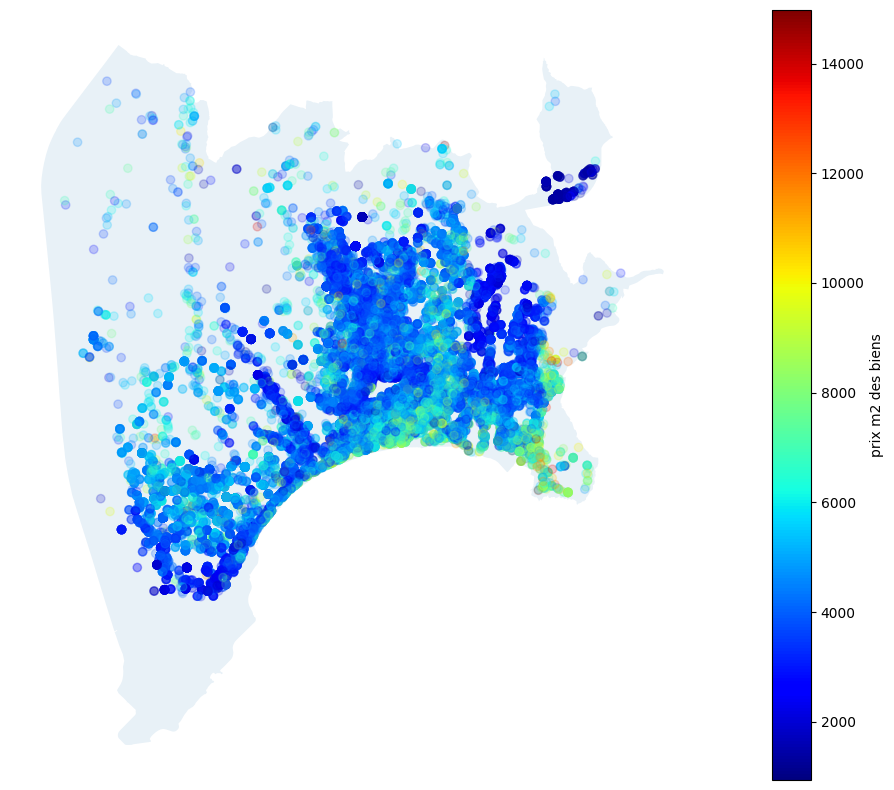

In [ ]:
bien('NICE', (20,10))

# Tous les biens par IRIS
*   choix de la métropole
*   fond IRIS = revenu médian
*   point bien est prix_m2_actualise
*   Élément de liste





In [ ]:
def iris_bien(area, size):

  '''
  Tous les biens d'une commune sur le fond de l'IRIS.
  Couleurs correspondend au revenus médian (IRIS) et au prix_m2 de chaque bien
  '''

  data_2.to_crs(iris.crs)
  # liste_iris = data_2[data_2['nom_commune'] == area].DCOMIRIS_left
  base = iris.loc[iris.NOM_COM == area].plot(column = 'DISP_MED19',
                                                                                figsize = size,
                                                                                cmap=cmap,
                                                                                legend = True,
                                                                                legend_kwds={'label': "revenu médian dans l'IRIS"})
  figure = data_2[data_2.NOM_COM == area].plot(ax = base,
                                                  column = 'prix_m2_actualise',
                                                  figsize = size,
                                                  legend = True, 
                                                  cmap=cmap,
                                                  legend_kwds={'label': "prix m2 des biens"})
  figure.set_axis_off()

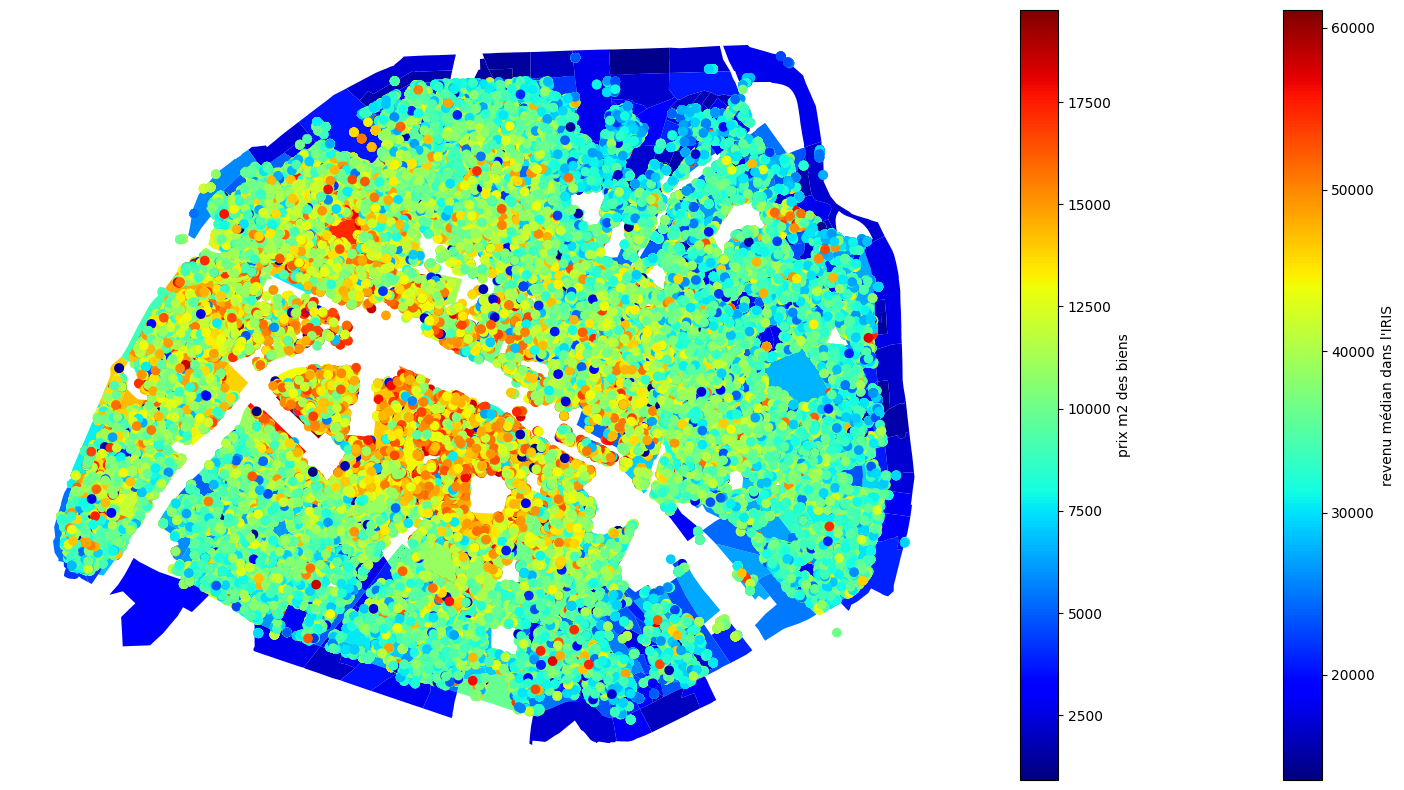

In [ ]:
iris_bien('PARIS', (20,10))

# IRIS + bien moyen
*   choix de la métropole
*   fond IRIS = choix de la variable
*   point bien = prix_m2_actualise

In [ ]:
iris_value.columns

Index(['IRIS', 'DISP_TP6019', 'DISP_Q119', 'DISP_MED19', 'DISP_Q319',
       'DISP_EQ19', 'DISP_D119', 'DISP_D219', 'DISP_D319', 'DISP_D419',
       'DISP_D619', 'DISP_D719', 'DISP_D819', 'DISP_D919', 'DISP_RD19',
       'DISP_S80S2019', 'DISP_GI19', 'DISP_PACT19', 'DISP_PTSA19',
       'DISP_PCHO19', 'DISP_PBEN19', 'DISP_PPEN19', 'DISP_PPAT19',
       'DISP_PPSOC19', 'DISP_PPFAM19', 'DISP_PPMINI19', 'DISP_PPLOGT19',
       'DISP_PIMPOT19', 'DISP_NOTE19'],
      dtype='object')

In [ ]:
def iris_bien_moyen(area, metrique, var_iris, name_var_iris, size):

  '''
  Bien moyen de chaque IRIS sur le fond de l'IRIS.
  Couleurs correspondend au revenus médian (IRIS) et au prix_m2 moyen des biens de l'IRIS
  '''


  inter = data_2.groupby(['DCOMIRIS_right'])[[metrique]].mean()
  inter.reset_index(inplace=True)
  iris_moyenne = inter.merge(iris, how = 'right', left_on = 'DCOMIRIS_right', right_on = 'DCOMIRIS')
  iris_moyenne = gpd.GeoDataFrame(iris_moyenne[[metrique, 'DCOMIRIS', 'NOM_COM']], geometry = iris_moyenne['geometry'])
  iris_moyenne['center'] = iris_moyenne.centroid
  base = iris.loc[iris.NOM_COM == area].plot(column = var_iris,
                                                                                figsize = size,
                                                                                legend = True,
                                                                                cmap=cmap, 
                                                                                legend_kwds={'label': "{}. dans l'IRIS".format(name_var_iris)})
  iris_moyenne = iris_moyenne.set_geometry('center').to_crs(iris.crs)
  figure = iris_moyenne[iris_moyenne.NOM_COM == area].plot(ax = base,
                                                  column = metrique,
                                                  figsize = size,
                                                  legend = True,
                                                  cmap=cmap,
                                                  legend_kwds={'label': "{}. dans l'IRIS".format(metrique)}
                                                  )

  figure.set_axis_off()

<ipython-input-64-3072cb780694>:13: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  iris_moyenne['center'] = iris_moyenne.centroid


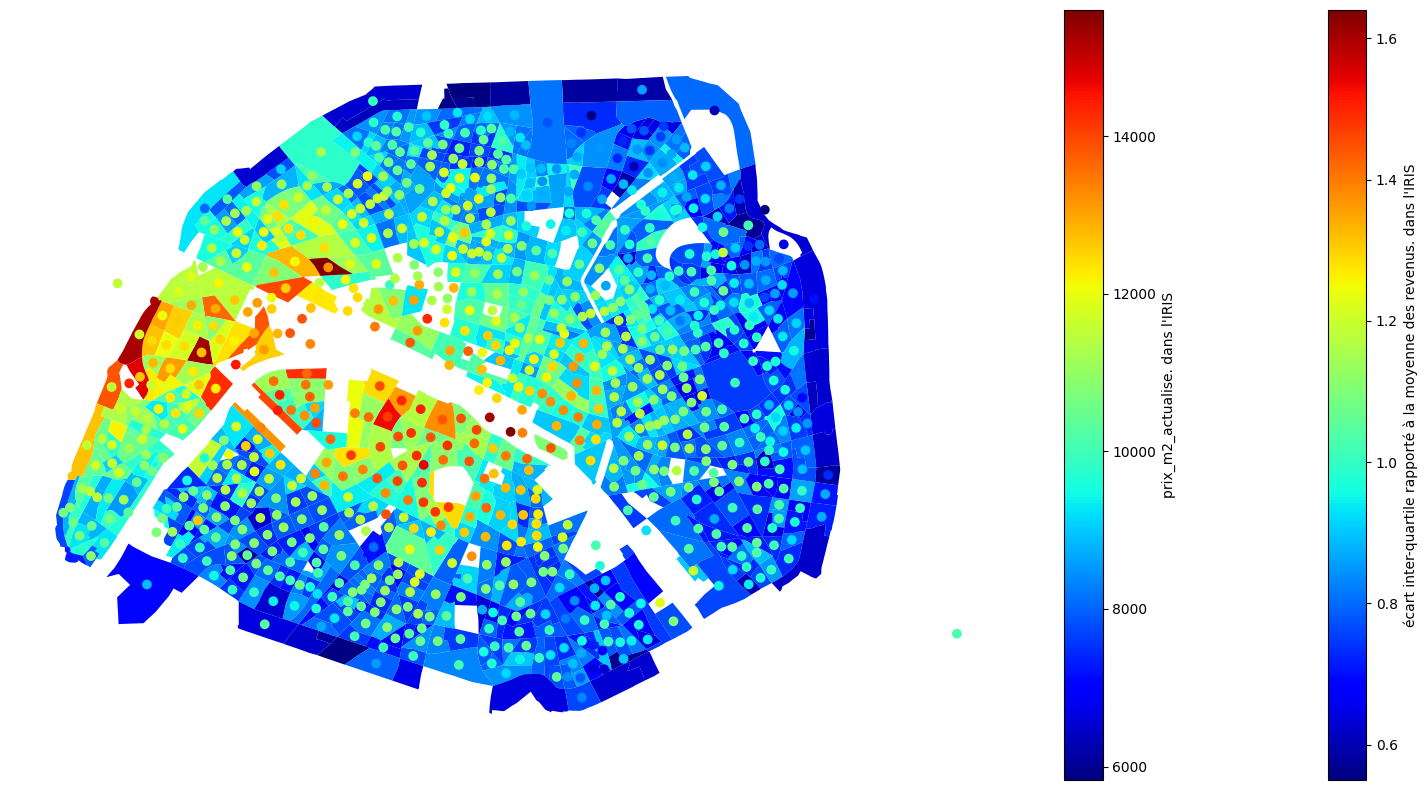

In [ ]:
iris_bien_moyen('PARIS', metrique = 'prix_m2_actualise', var_iris = 'DISP_EQ19', name_var_iris = 'écart inter-quartile rapporté à la moyenne des revenus', size = (20,10))

<ipython-input-64-3072cb780694>:13: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  iris_moyenne['center'] = iris_moyenne.centroid


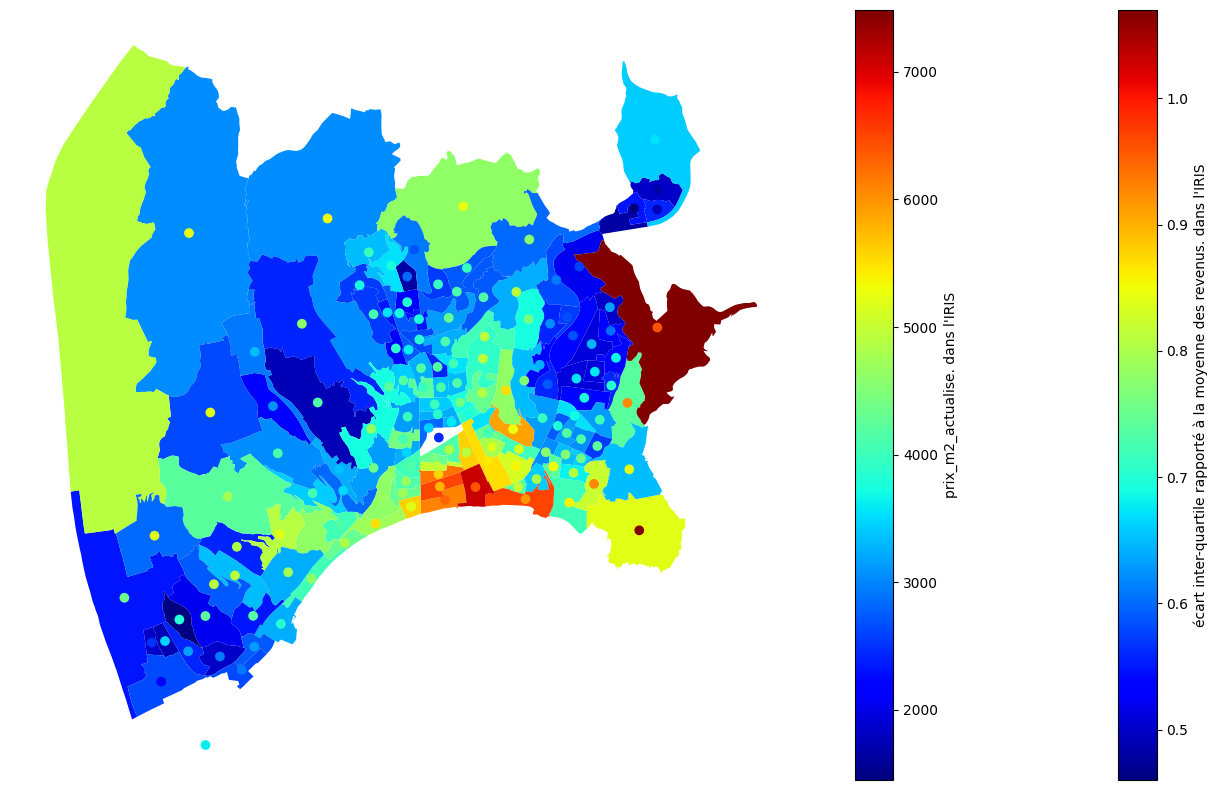

In [ ]:
iris_bien_moyen('NICE', metrique = 'prix_m2_actualise', var_iris = 'DISP_EQ19', name_var_iris = 'écart inter-quartile rapporté à la moyenne des revenus', size = (20,10))

# Préparation Equipements

In [12]:
equipements = pd.read_csv('/content/drive/Shareddrives/BDC Meilleur Taux Grp 4/base de données/bpe21_ensemble_xy.csv', sep = ';')

<ipython-input-12-3b3305ecf82a>:1: DtypeWarning: Columns (2,3,4,6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  equipements = pd.read_csv('/content/drive/Shareddrives/BDC Meilleur Taux Grp 4/base de données/bpe21_ensemble_xy.csv', sep = ';')


In [13]:
equipements = gpd.GeoDataFrame(
    equipements, geometry = gpd.points_from_xy(equipements.LAMBERT_X, equipements.LAMBERT_Y))

In [14]:
liste_equi = ['A203', 'A206', 'B101', 'C101',  'C201', 'D201', 'E107', 'F303', 'F307',  'F313']
equipements = equipements[equipements['TYPEQU'].isin(liste_equi)]
equipements = equipements.replace({'A203': 'Banque', 'A206': 'Poste', 'B101': 'Alimentation', 'C101': 'Ecoles',  'C201': 'College-Lycee',
                         'D201': 'Medecin', 'E107': 'Gare',  'F303': 'Cinema', 'F307': 'Bibliotheque',  'F313': 'Patrimoine'})

In [15]:
equipements_crs = equipements.set_crs('2154')

In [23]:
equipements_crs = equipements_crs.to_crs(iris.crs)

In [36]:
equipements_crs.TYPEQU

42169            Banque
42198            Banque
42283            Banque
42284            Banque
42314            Banque
               ...     
2332697    Alimentation
2332698    Alimentation
2332699    Alimentation
2332700    Alimentation
2332701    Alimentation
Name: TYPEQU, Length: 130061, dtype: object

# Equipements par ville, fond ville

In [43]:
def equi(area, num_com, size, filter = 'None'):

  if filter == None :
    
    base = communes_shape[communes_shape.nom == area].plot(figsize = size, alpha = 0.1)
    
    figure = equipements_crs[equipements_crs['DEPCOM'] == num_com].plot(ax = base,
                                                                column = 'TYPEQU',
                                                                figsize = size,
                                                                legend = True, 
                                                                cmap=plt.get_cmap("jet")
                                                                # legend_kwds={'label': "Type d'équipement"}
                                                                )
    figure.set_axis_off()

  else:

    equipements_crs_2 = equipements_crs[equipements_crs['TYPEQU']==filter]
    
    base = communes_shape[communes_shape.nom == area].plot(figsize = size, alpha = 0.1)
    
    figure = equipements_crs_2[equipements_crs_2['DEPCOM'] == num_com].plot(ax = base,
                                                                column = 'TYPEQU',
                                                                figsize = size,
                                                                legend = True, 
                                                                cmap=plt.get_cmap("jet")
                                                                # legend_kwds={'label': "Type d'équipement"}
                                                                )


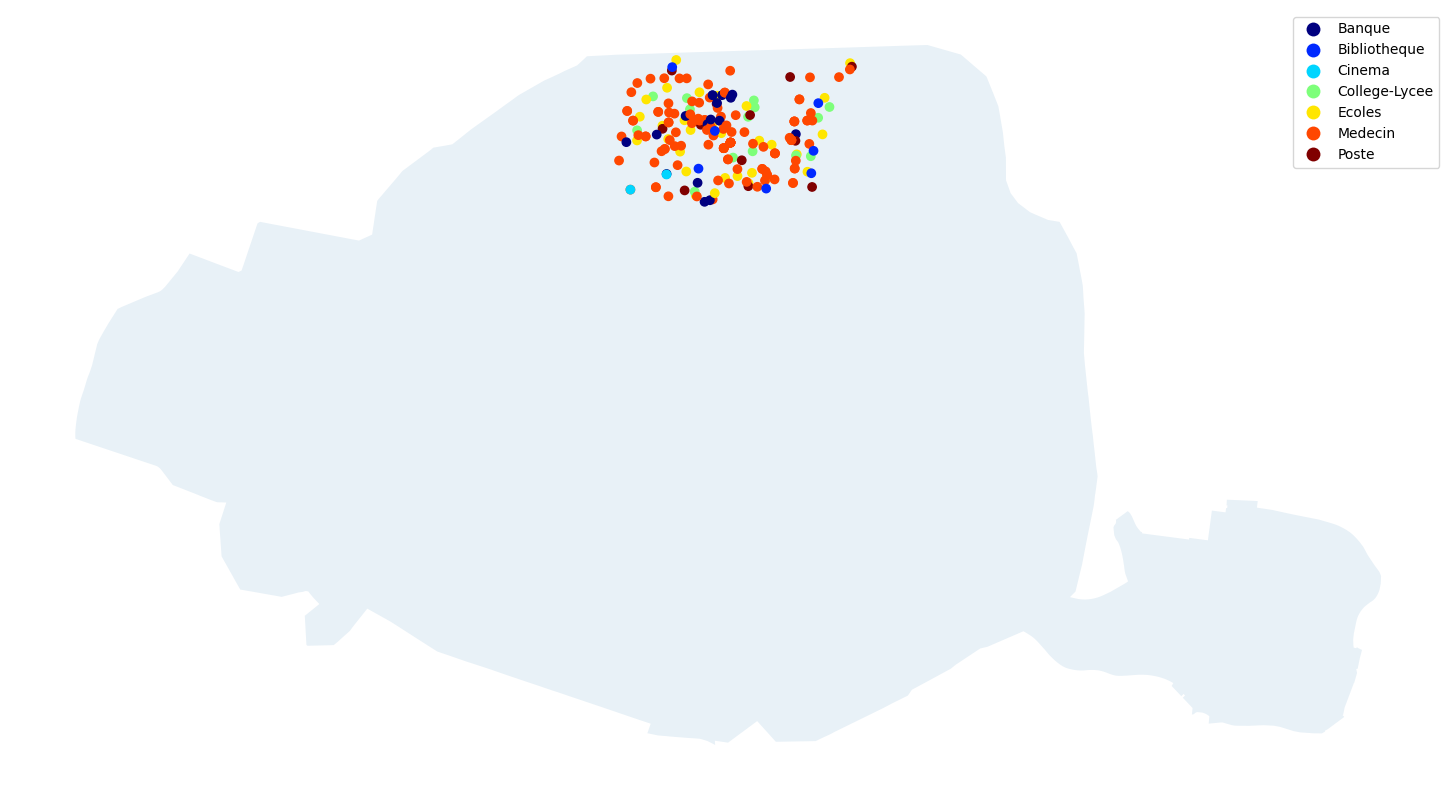

In [25]:
equi('PARIS', '75118', (20,10))

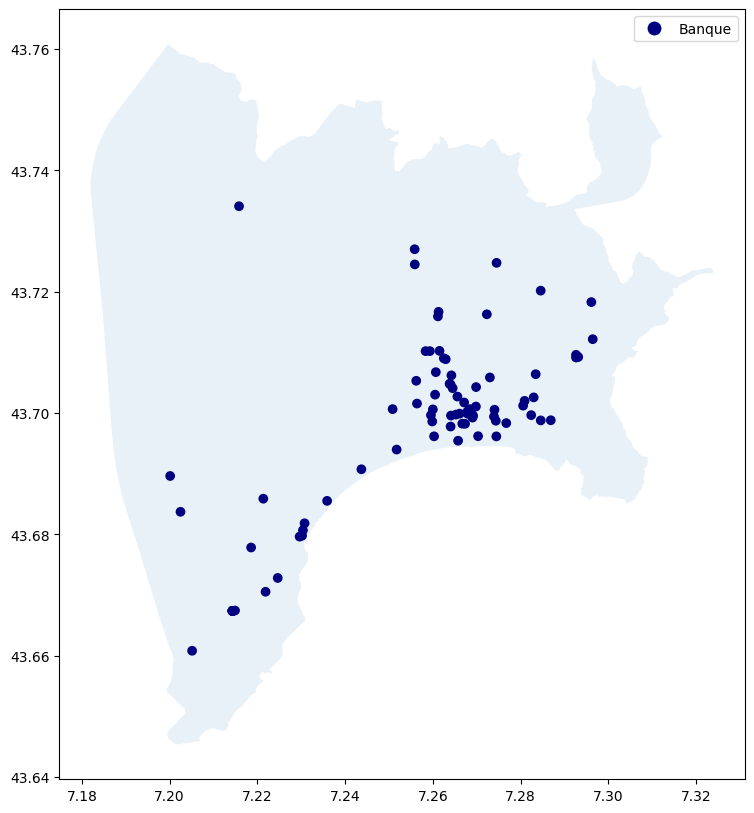

In [45]:
equi('NICE','06088',(20,10), filter='Banque')

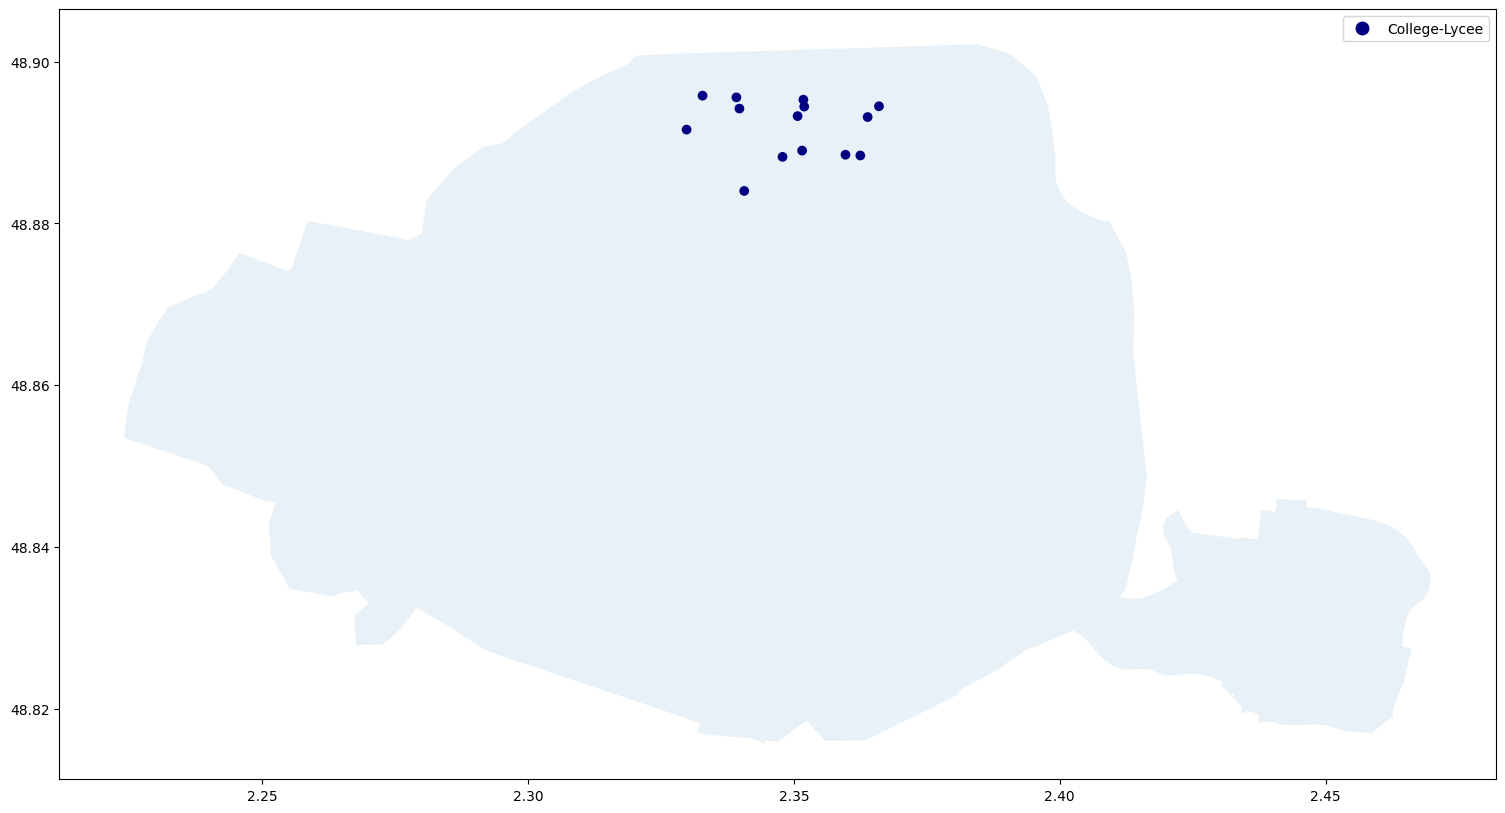

In [47]:
equi('PARIS','75118',(20,10), filter='College-Lycee')

In [29]:
data_2[data_2.NOM_COM=='NICE']

id_mutation date_mutation  numero_disposition  valeur_fonciere  \
1       2017-20886    2017-07-03                   1         117500.0   
2       2017-20887    2017-07-04                   1         173000.0   
3       2017-20888    2017-07-06                   1         242000.0   
4       2017-20889    2017-07-07                   1         305200.0   
5       2017-20890    2017-07-03                   1         210000.0   
...            ...           ...                 ...              ...   
987425  2022-21622    2022-06-20                   1         455000.0   
987427  2022-21643    2022-06-30                   1         700000.0   
987432  2022-21847    2022-06-30                   1         455000.0   
987433  2022-21891    2022-06-29                   1         885000.0   
987435  2022-21957    2022-06-29                   1        1350000.0   

        adresse_numero   adresse_nom_voie adresse_code_voie  code_commune  \
1                 30.0        AV PAULIANI              4915          6088   
2                 24.0         AV SCUDERI              6140          6088   
3                  9.0        RUE TRACHEL              6455          6088   
4                  9.0          RUE PUGET              5320          6088   
5                  2.0        RUE TRACHEL              6455          6088   
...                ...                ...               ...           ...   
987425            20.0     MTE DESAMBROIS              1920          6088   
987427            21.0      RUE DES LILAS              3680          6088   
987432            22.0     AV CARAVADOSSI              1130          6088   
987433             5.0     AV MONT RABEAU              4390          6088   
987435             1.0  RUE ANDRE GUINARD              0212          6088   

       nom_commune  code_departement                     LIBEPCI  \
1             Nice                 6  Métropole Nice Côte d'Azur   
2             Nice                 6  Métropole Nice Côte d'Azur   
3             Nice                 6  Métropole Nice Côte d'Azur   
4             Nice                 6  Métropole Nice Côte d'Azur   
5             Nice                 6  Métropole Nice Côte d'Azur   
...            ...               ...                         ...   
987425        Nice                 6  Métropole Nice Côte d'Azur   
987427        Nice                 6  Métropole Nice Côte d'Azur   
987432        Nice                 6  Métropole Nice Côte d'Azur   
987433        Nice                 6  Métropole Nice Côte d'Azur   
987435        Nice                 6  Métropole Nice Côte d'Azur   

           id_parcelle  nombre_lots lot1_numero  lot1_surface_carrez  \
1       06088000LE0258            1          12                20.11   
2       06088000HK0102            2         220                34.21   
3       06088000KZ0020            1          16                  NaN   
4       06088000LN0067            2           3                  NaN   
5       06088000LS0250            2          11                  NaN   
...                ...          ...         ...                  ...   
987425  06088000LE0329            1         1.0                  NaN   
987427  06088000HA0232            0         NaN                  NaN   
987432  06088000LP0167            0         NaN                  NaN   
987433  06088000NE0085            0         NaN                  NaN   
987435  06088000IZ0100            0         NaN                  NaN   

       lot2_numero  lot2_surface_carrez lot3_numero  lot3_surface_carrez  \
1              NaN                  NaN         NaN                  NaN   
2               89                  NaN         NaN                  NaN   
3              NaN                  NaN         NaN                  NaN   
4               32                  NaN         NaN                  NaN   
5               21                94.15         NaN                  NaN   
...            ...                  ...         ...                

# Equipements par IRIS, fond IRIS

In [ ]:
def equi_iris(num_iris, size):

  base = iris[iris.DCOMIRIS == num_iris].plot(figsize = size, alpha = 0.1)


  figure = equipements_crs[equipements_crs['DCIRIS'] == num_iris].plot(ax = base,
                                                              column = 'TYPEQU',
                                                              figsize = size,
                                                              legend = True, 
                                                              cmap=plt.get_cmap("jet")
                                                              # legend_kwds={'label': "Type d'équipement"}
                                                              )
  figure.set_axis_off()

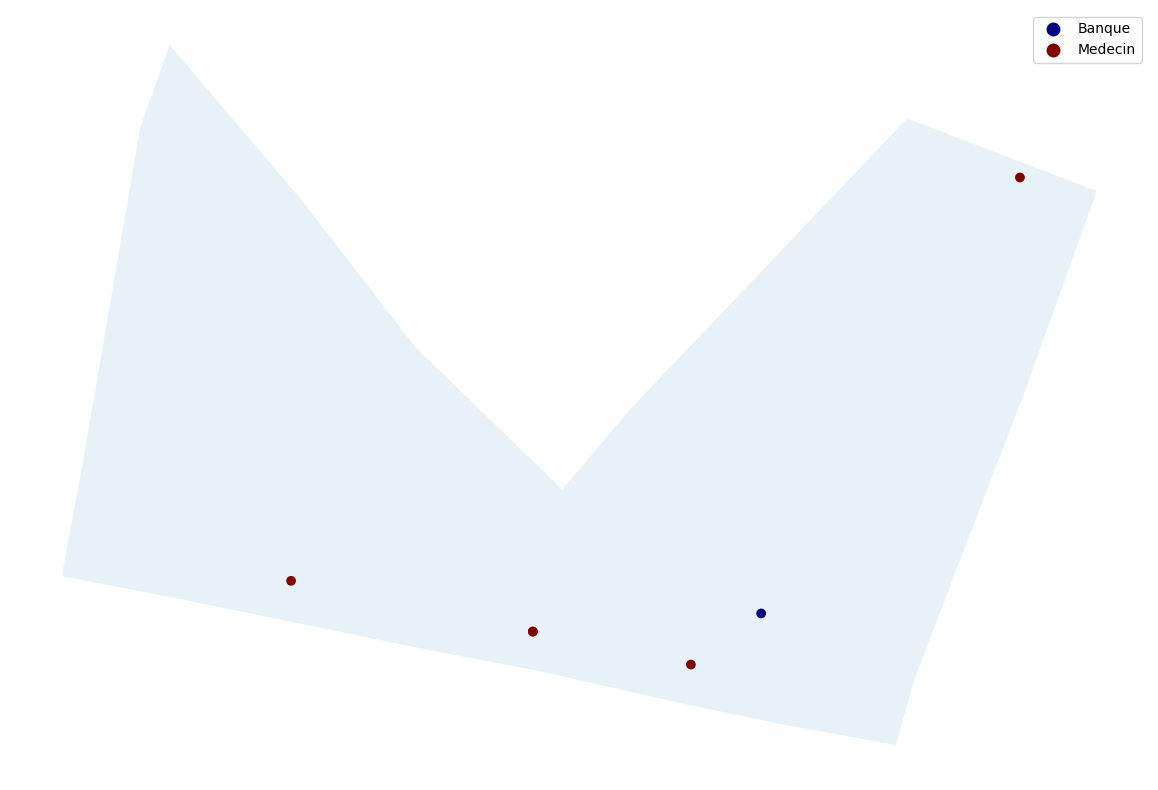

In [ ]:
equi_iris('751187022', (20,10))

# Corrélation entre deux variables par IRIS

*   choix de la métropole
*   choix des deux variables pours lesquelles étudier la corrélation
*   valeur par defaut des colonnes : prix_m2_actualise et prix_m2_zone -> permet d'étudier la corrélation spatiale du prix au m2
*   choix de la méthode de correlation (kendall, spearman ou pearson)



In [ ]:
def corr_iris(method, iris, col_1, col_2):
  points_iris = data_2[(data_2['IRIS_x']==iris[0]) & (data_2['IRIS_y']==iris[1])]
  x, y = [points_iris[col_1],points_iris[col_2]]
  if (len(x)>2) & (np.min(x)!= np.max(x)) & (np.min(y)!= np.max(y)):
    if method == 'pearson':
      corr = scipy.stats.pearsonr(x, y)[0]
    elif method == 'spearman':
      corr = scipy.stats.spearmanr(x, y)[0]
    elif method == 'kendall':
      corr = scipy.stats.kendalltau(x, y)[0]
  else:
    corr = np.nan
  return(corr)

def plot_corr_spatiale(area, col_1 = 'prix_m2_actualise', col_2 = 'prix_m2_zone', method = 'spearman', size=(20,10)):
  base_area = iris.loc[iris.NOM_COM == area].reset_index(drop=True)
  column_corr = []
  for index_iris in tqdm(base_area.index):
    data_iris = base_area.iloc[index_iris]
    column_corr.append(corr_iris(method, [data_iris['IRIS_x'],data_iris['IRIS_y']], col_1, col_2))
  base_area['corr_spatiale'] = column_corr

  base = communes_shape[communes_shape.nom == area].plot(figsize = size, alpha = 0.1)

  figure = base_area.plot(ax = base,
                                                  column = 'corr_spatiale',
                                                  figsize = size,
                                                  legend = True, 
                                                  cmap=cmap,
                                                  legend_kwds={'label': "Corrélation spatiale dans l'IRIS ({}) dans la ville de {}".format(method, area)})

  figure.set_axis_off()

In [ ]:
plot_corr_spatiale('PARIS',method = 'spearman')
plot_corr_spatiale('LYON',method = 'spearman')
plot_corr_spatiale('LILLE',method = 'spearman')
plot_corr_spatiale('MARSEILLE',method = 'spearman')
plot_corr_spatiale('MONTPELLIER',method = 'spearman')
plot_corr_spatiale('TOULOUSE',method = 'spearman')
plot_corr_spatiale('BORDEAUX',method = 'spearman')
plot_corr_spatiale('RENNES',method = 'spearman')
plot_corr_spatiale('NANTES',method = 'spearman')
plot_corr_spatiale('NICE',method = 'spearman')